In [1]:
import keras 
import tensorflow as tf
import keras.backend.tensorflow_backend as K
from PIL import Image
from imutils import paths
from os import path
from keras.optimizers import Adam,RMSprop
import pandas as pd
keras.__version__
IMAGE_DIMS = (400,300,3)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

In [3]:
data = pd.read_csv("dataset/value/V02Q1940160-2분지연.csv", sep=',',names=['A', 'B', 'C', 'D', 'E', 'F','G','H'], encoding="CP949")[1:]

mode = "F"
# C는 미세먼지 B는 초미세먼지 

# 보정 F는 미세먼지 G는 는 초미세먼지
print(data)

dust = data[mode]

humi = data['E']

date = data['H']

print(np.array(date).reshape(len(date),1).shape)
data = np.concatenate([np.array(date).reshape(len(date),1),
                       np.array(humi).reshape(len(humi),1),
                       np.array(dust).reshape(len(dust),1)],axis = 1)
print(data.shape)
print(data[0])
date = date.tolist()
date = list(map(int,date))

                  A   B   C        D   E   F   G              H
1       V02Q1940160   9  18  23.0999  95  24  10  202008010002 
2       V02Q1940160   8  19  23.0999  96  25   9  202008010004 
3       V02Q1940160   3   7  23.0999  96   9   3  202008010006 
4       V02Q1940160   2   4  23.0999  96   5   2  202008010008 
5       V02Q1940160   2   3  23.0999  96   4   2  202008010012 
...             ...  ..  ..      ...  ..  ..  ..            ...
100229  V02Q1940160  11  11     -3.5  65  22  16   202101301008
100230  V02Q1940160  11  11     -3.5  65  22  16   202101301010
100231  V02Q1940160  10  11     -3.5  65  22  14   202101301012
100232  V02Q1940160  11  11     -3.5  65  22  16   202101301014
100233  V02Q1940160  10  11     -3.4  65  22  14   202101301016

[100233 rows x 8 columns]
(100233, 1)
(100233, 3)
['202008010002 ' '95' '24']


c:\users\teado\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import time

start = time.time() 
imagePaths = sorted(list(paths.list_images('./dataset/image')))
date_arr = []
image_arr = []
result_arr = []

dust = np.array(dust)


for i in imagePaths:
    img_name = int(path.splitext(path.basename(i))[0])
    
    print(img_name)
    if img_name in date :
        j = date.index(img_name)
        #result_arr.append(np.average(np.array([dust[j-7:j]],dtype = np.float64)))
        date_arr.append(img_name)
        print(img_name, "index is :", j)
#         image = Image.open(i)
#         image = image.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
#         image = img_to_array(image)
#         image_arr.append(image)
        
    elif img_name-1 in date :
        j = date.index(img_name-1)
        #result_arr.append(np.average(np.array([dust[j-7:j]],dtype = np.float64)))
        print(img_name, "index is :", j)
        date_arr.append(img_name)
#         image = Image.open(i)
#         image = image.resize((IMAGE_DIMS[0],IMAGE_DIMS[1]))
#         image = img_to_array(image)
#         image_arr.append(image)

    
#     for j in range(0,len(date)-1):
        
#         if path.splitext(path.basename(i))[0] == str(date[j]).rstrip():
#             result_arr.append(np.average(np.array([dust[j-3:j+4]],dtype = np.float64)))
#             break
            
#         elif path.splitext(path.basename(i))[0] == str(int(date[j])-1).rstrip():
#             result_arr.append(np.average(np.array([dust[j-3:j+4]],dtype = np.float64)))
#             break

print(len(date_arr))


print("time :", time.time() - start)

202009100641
202009100641 index is : 24101
202009100642
202009100642 index is : 24102
202009100643
202009100643 index is : 24102
202009100644
202009100644 index is : 24103
202009100645
202009100645 index is : 24103
202009100646
202009100646 index is : 24104
202009100647
202009100647 index is : 24104
202009100648
202009100648 index is : 24105
202009100649
202009100649 index is : 24105
202009100650
202009100650 index is : 24106
202009100651
202009100651 index is : 24106
202009100652
202009100652 index is : 24107
202009100653
202009100653 index is : 24107
202009100654
202009100654 index is : 24108
202009100655
202009100655 index is : 24108
202009100656
202009100656 index is : 24109
202009100657
202009100657 index is : 24109
202009100658
202009100658 index is : 24110
202009100659
202009100659 index is : 24110
202009100700
202009100700 index is : 24111
202009100701
202009100701 index is : 24111
202009100702
202009100702 index is : 24112
202009100703
202009100703 index is : 24112
20200910070

202009151241 index is : 27152
202009151242
202009151242 index is : 27153
202009151243
202009151243 index is : 27153
202009151244
202009151244 index is : 27154
202009151245
202009151245 index is : 27154
202009151246
202009151246 index is : 27155
202009151247
202009151247 index is : 27155
202009151248
202009151248 index is : 27156
202009151249
202009151249 index is : 27156
202009151250
202009151250 index is : 27157
202009151251
202009151251 index is : 27157
202009151252
202009151252 index is : 27158
202009151253
202009151253 index is : 27158
202009151254
202009151254 index is : 27159
202009151255
202009151255 index is : 27159
202009151256
202009151257
202009151258
202009151258 index is : 27160
202009151259
202009151259 index is : 27160
202009151300
202009151301
202009151302
202009151302 index is : 27161
202009151303
202009151303 index is : 27161
202009151304
202009151304 index is : 27162
202009151305
202009151305 index is : 27162
202009151306
202009151307
202009151308
202009151308 index 

202009161209 index is : 27749
202009161210
202009161210 index is : 27750
202009161211
202009161211 index is : 27750
202009161212
202009161212 index is : 27751
202009161213
202009161213 index is : 27751
202009161214
202009161214 index is : 27752
202009161215
202009161215 index is : 27752
202009161216
202009161217
202009161218
202009161218 index is : 27753
202009161219
202009161219 index is : 27753
202009161220
202009161220 index is : 27754
202009161221
202009161221 index is : 27754
202009161222
202009161222 index is : 27755
202009161223
202009161223 index is : 27755
202009161224
202009161224 index is : 27756
202009161225
202009161225 index is : 27756
202009161226
202009161226 index is : 27757
202009161227
202009161227 index is : 27757
202009161228
202009161228 index is : 27758
202009161229
202009161229 index is : 27758
202009161230
202009161230 index is : 27759
202009161231
202009161231 index is : 27759
202009161232
202009161232 index is : 27760
202009161233
202009161233 index is : 2776

202009161549 index is : 27846
202009161550
202009161550 index is : 27847
202009161551
202009161551 index is : 27847
202009161552
202009161552 index is : 27848
202009161553
202009161553 index is : 27848
202009161554
202009161554 index is : 27849
202009161555
202009161555 index is : 27849
202009161556
202009161557
202009161558
202009161558 index is : 27850
202009161559
202009161559 index is : 27850
202009161600
202009161600 index is : 27851
202009161601
202009161601 index is : 27851
202009161602
202009161603
202009161604
202009161605
202009161606
202009161607
202009161608
202009161608 index is : 27852
202009161609
202009161609 index is : 27852
202009161610
202009161610 index is : 27853
202009161611
202009161611 index is : 27853
202009161612
202009161612 index is : 27854
202009161613
202009161613 index is : 27854
202009161614
202009161614 index is : 27855
202009161615
202009161615 index is : 27855
202009161616
202009161616 index is : 27856
202009161617
202009161617 index is : 27856
202009

202009181301 index is : 28959
202009181302
202009181302 index is : 28960
202009181303
202009181303 index is : 28960
202009181304
202009181304 index is : 28961
202009181305
202009181305 index is : 28961
202009181306
202009181306 index is : 28962
202009181307
202009181307 index is : 28962
202009181308
202009181309
202009181310
202009181310 index is : 28963
202009181311
202009181311 index is : 28963
202009181312
202009181312 index is : 28964
202009181313
202009181313 index is : 28964
202009181314
202009181314 index is : 28965
202009181315
202009181315 index is : 28965
202009181316
202009181316 index is : 28966
202009181317
202009181317 index is : 28966
202009181318
202009181318 index is : 28967
202009181319
202009181319 index is : 28967
202009181320
202009181320 index is : 28968
202009181321
202009181321 index is : 28968
202009181322
202009181322 index is : 28969
202009181323
202009181323 index is : 28969
202009181324
202009181324 index is : 28970
202009181325
202009181325 index is : 2897

202009181631 index is : 29051
202009181632
202009181632 index is : 29052
202009181633
202009181633 index is : 29052
202009181634
202009181634 index is : 29053
202009181635
202009181635 index is : 29053
202009181636
202009181636 index is : 29054
202009181637
202009181637 index is : 29054
202009181638
202009181638 index is : 29055
202009181639
202009181639 index is : 29055
202009181640
202009181640 index is : 29056
202009181641
202009181641 index is : 29056
202009181642
202009181643
202009181644
202009181644 index is : 29057
202009181645
202009181645 index is : 29057
202009181646
202009181647
202009181648
202009181648 index is : 29058
202009181649
202009181649 index is : 29058
202009181650
202009181650 index is : 29059
202009181651
202009181651 index is : 29059
202009181652
202009181652 index is : 29060
202009181653
202009181653 index is : 29060
202009181654
202009181655
202009181656
202009181656 index is : 29061
202009181657
202009181657 index is : 29061
202009181658
202009181659
202009

202009191151 index is : 29510
202009191152
202009191153
202009191154
202009191154 index is : 29511
202009191155
202009191155 index is : 29511
202009191156
202009191157
202009191158
202009191159
202009191200
202009191201
202009191202
202009191202 index is : 29512
202009191203
202009191203 index is : 29512
202009191204
202009191204 index is : 29513
202009191205
202009191205 index is : 29513
202009191206
202009191206 index is : 29514
202009191207
202009191207 index is : 29514
202009191208
202009191208 index is : 29515
202009191209
202009191209 index is : 29515
202009191210
202009191210 index is : 29516
202009191211
202009191211 index is : 29516
202009191212
202009191212 index is : 29517
202009191213
202009191213 index is : 29517
202009191214
202009191215
202009191216
202009191217
202009191218
202009191218 index is : 29518
202009191219
202009191219 index is : 29518
202009191220
202009191220 index is : 29519
202009191221
202009191221 index is : 29519
202009191222
202009191222 index is : 295

202009210751 index is : 30557
202009210752
202009210752 index is : 30558
202009210753
202009210753 index is : 30558
202009210754
202009210755
202009210756
202009210756 index is : 30559
202009210757
202009210757 index is : 30559
202009210758
202009210758 index is : 30560
202009210759
202009210759 index is : 30560
202009210800
202009210800 index is : 30561
202009210801
202009210801 index is : 30561
202009210802
202009210802 index is : 30562
202009210803
202009210803 index is : 30562
202009210804
202009210804 index is : 30563
202009210805
202009210805 index is : 30563
202009210806
202009210806 index is : 30564
202009210807
202009210807 index is : 30564
202009210808
202009210808 index is : 30565
202009210809
202009210809 index is : 30565
202009210810
202009210810 index is : 30566
202009210811
202009210811 index is : 30566
202009210812
202009210812 index is : 30567
202009210813
202009210813 index is : 30567
202009210814
202009210814 index is : 30568
202009210815
202009210815 index is : 3056

202009221027 index is : 31218
202009221028
202009221028 index is : 31219
202009221029
202009221029 index is : 31219
202009221030
202009221030 index is : 31220
202009221031
202009221031 index is : 31220
202009221032
202009221032 index is : 31221
202009221033
202009221033 index is : 31221
202009221034
202009221034 index is : 31222
202009221035
202009221035 index is : 31222
202009221036
202009221036 index is : 31223
202009221037
202009221037 index is : 31223
202009221038
202009221038 index is : 31224
202009221039
202009221039 index is : 31224
202009221040
202009221040 index is : 31225
202009221041
202009221041 index is : 31225
202009221042
202009221043
202009221044
202009221045
202009221046
202009221046 index is : 31226
202009221047
202009221047 index is : 31226
202009221048
202009221048 index is : 31227
202009221049
202009221049 index is : 31227
202009221050
202009221051
202009221052
202009221052 index is : 31228
202009221053
202009221053 index is : 31228
202009221054
202009221054 index 

202009231111 index is : 31850
202009231112
202009231112 index is : 31851
202009231113
202009231113 index is : 31851
202009231114
202009231114 index is : 31852
202009231115
202009231115 index is : 31852
202009231116
202009231117
202009231118
202009231118 index is : 31853
202009231119
202009231119 index is : 31853
202009231120
202009231121
202009231122
202009231122 index is : 31854
202009231123
202009231123 index is : 31854
202009231124
202009231124 index is : 31855
202009231125
202009231125 index is : 31855
202009231126
202009231126 index is : 31856
202009231127
202009231127 index is : 31856
202009231128
202009231128 index is : 31857
202009231129
202009231129 index is : 31857
202009231130
202009231130 index is : 31858
202009231131
202009231131 index is : 31858
202009231132
202009231132 index is : 31859
202009231133
202009231133 index is : 31859
202009231134
202009231134 index is : 31860
202009231135
202009231135 index is : 31860
202009231136
202009231136 index is : 31861
202009231137
20

202009241727 index is : 32653
202009241728
202009241728 index is : 32654
202009241729
202009241729 index is : 32654
202009241730
202009241730 index is : 32655
202009241731
202009241731 index is : 32655
202009241732
202009241732 index is : 32656
202009241733
202009241733 index is : 32656
202009241734
202009241734 index is : 32657
202009241735
202009241735 index is : 32657
202009241736
202009241736 index is : 32658
202009241737
202009241737 index is : 32658
202009241738
202009241738 index is : 32659
202009241739
202009241739 index is : 32659
202009241740
202009241740 index is : 32660
202009241741
202009241741 index is : 32660
202009241742
202009241742 index is : 32661
202009241743
202009241743 index is : 32661
202009241744
202009241744 index is : 32662
202009241745
202009241745 index is : 32662
202009241746
202009241746 index is : 32663
202009241747
202009241747 index is : 32663
202009241748
202009241748 index is : 32664
202009241749
202009241749 index is : 32664
202009241750
20200924175

202009260952
202009260952 index is : 33717
202009260953
202009260953 index is : 33717
202009260954
202009260954 index is : 33718
202009260955
202009260955 index is : 33718
202009260956
202009260956 index is : 33719
202009260957
202009260957 index is : 33719
202009260958
202009260958 index is : 33720
202009260959
202009260959 index is : 33720
202009261000
202009261000 index is : 33721
202009261001
202009261001 index is : 33721
202009261002
202009261002 index is : 33722
202009261003
202009261003 index is : 33722
202009261004
202009261004 index is : 33723
202009261005
202009261005 index is : 33723
202009261006
202009261006 index is : 33724
202009261007
202009261007 index is : 33724
202009261008
202009261008 index is : 33725
202009261009
202009261009 index is : 33725
202009261010
202009261010 index is : 33726
202009261011
202009261011 index is : 33726
202009261012
202009261012 index is : 33727
202009261013
202009261013 index is : 33727
202009261014
202009261014 index is : 33728
20200926101

202009261532
202009261533
202009261534
202009261535
202009261536
202009261537
202009261538
202009261539
202009261540
202009261541
202009261542
202009261543
202009261544
202009261545
202009261546
202009261547
202009261548
202009261549
202009261550
202009261551
202009261552
202009261553
202009261554
202009261555
202009261556
202009261557
202009261558
202009261559
202009261600
202009261601
202009261602
202009261603
202009261604
202009261605
202009261606
202009261607
202009261608
202009261609
202009261610
202009261611
202009261612
202009261613
202009261614
202009261615
202009261616
202009261617
202009261618
202009261619
202009261620
202009261621
202009261622
202009261623
202009261624
202009261625
202009261626
202009261627
202009261628
202009261629
202009261630
202009261631
202009261632
202009261633
202009261634
202009261635
202009261636
202009261637
202009261638
202009261639
202009261640
202009261641
202009261642
202009261643
202009261644
202009261645
202009261646
202009261647
202009261648

202009290802
202009290803
202009290804
202009290805
202009290806
202009290807
202009290808
202009290809
202009290810
202009290811
202009290812
202009290813
202009290814
202009290815
202009290816
202009290817
202009290818
202009290819
202009290820
202009290821
202009290822
202009290823
202009290824
202009290825
202009290826
202009290827
202009290828
202009290829
202009290830
202009290831
202009290832
202009290833
202009290834
202009290835
202009290836
202009290837
202009290838
202009290839
202009290840
202009290841
202009290842
202009290843
202009290844
202009290845
202009290846
202009290847
202009290848
202009290849
202009290850
202009290851
202009290852
202009290853
202009290854
202009290855
202009290856
202009290857
202009290858
202009290859
202009290900
202009290901
202009290902
202009290903
202009290904
202009290905
202009290906
202009290907
202009290908
202009290909
202009290910
202009290911
202009290912
202009290913
202009290914
202009290915
202009290916
202009290917
202009290918

202010011539
202010011540
202010011541
202010011542
202010011543
202010011544
202010011545
202010011546
202010011547
202010011548
202010011549
202010011550
202010011551
202010011552
202010011553
202010011554
202010011555
202010011556
202010011557
202010011558
202010011559
202010011600
202010011601
202010011602
202010011603
202010011604
202010011605
202010011606
202010011607
202010011608
202010011609
202010011610
202010011611
202010011612
202010011613
202010011614
202010011615
202010011616
202010011617
202010011618
202010011619
202010011620
202010011621
202010011622
202010011623
202010011624
202010011625
202010011626
202010011627
202010011628
202010011629
202010011630
202010011631
202010011632
202010011633
202010011634
202010011635
202010011636
202010011637
202010011638
202010011639
202010011640
202010011641
202010011642
202010011643
202010011644
202010011645
202010011646
202010011647
202010011648
202010011649
202010011650
202010011651
202010011652
202010011653
202010011654
202010011655

202010021734
202010021735
202010021736
202010021737
202010021738
202010021739
202010021740
202010021741
202010021742
202010021743
202010030700
202010030701
202010030702
202010030703
202010030704
202010030705
202010030706
202010030707
202010030708
202010030709
202010030710
202010030711
202010030712
202010030713
202010030714
202010030715
202010030716
202010030717
202010030718
202010030719
202010030720
202010030721
202010030722
202010030723
202010030724
202010030725
202010030726
202010030727
202010030728
202010030729
202010030730
202010030731
202010030732
202010030733
202010030734
202010030735
202010030736
202010030737
202010030738
202010030739
202010030740
202010030741
202010030742
202010030743
202010030744
202010030745
202010030746
202010030747
202010030748
202010030749
202010030750
202010030751
202010030752
202010030753
202010030754
202010030755
202010030756
202010030757
202010030758
202010030759
202010030800
202010030801
202010030802
202010030803
202010030804
202010030805
202010030806

202010040853
202010040854
202010040855
202010040856
202010040857
202010040858
202010040859
202010040900
202010040901
202010040902
202010040903
202010040904
202010040905
202010040906
202010040907
202010040908
202010040909
202010040910
202010040911
202010040912
202010040913
202010040914
202010040915
202010040916
202010040917
202010040918
202010040919
202010040920
202010040921
202010040922
202010040923
202010040924
202010040925
202010040926
202010040927
202010040928
202010040929
202010040930
202010040931
202010040932
202010040933
202010040934
202010040935
202010040936
202010040937
202010040938
202010040939
202010040940
202010040941
202010040942
202010040943
202010040944
202010040945
202010040946
202010040947
202010040948
202010040949
202010040950
202010040951
202010040952
202010040953
202010040954
202010040955
202010050701
202010050702
202010050703
202010050704
202010050705
202010050706
202010050707
202010050708
202010050709
202010050710
202010050711
202010050712
202010050713
202010050714

202010061631
202010061632
202010061633
202010061634
202010061635
202010061636
202010061637
202010061638
202010061639
202010061640
202010061641
202010061642
202010061643
202010061644
202010061645
202010061646
202010061647
202010061648
202010061649
202010061650
202010061651
202010061652
202010061653
202010061654
202010061655
202010061656
202010061657
202010061658
202010061659
202010061700
202010061701
202010061702
202010061703
202010061704
202010061705
202010061706
202010061707
202010061708
202010061709
202010061710
202010061711
202010061712
202010061713
202010061714
202010061715
202010061716
202010061717
202010061718
202010061719
202010061720
202010061721
202010061722
202010061723
202010061724
202010061725
202010061726
202010061727
202010061728
202010061729
202010061730
202010061731
202010061732
202010061733
202010061734
202010061735
202010061736
202010061737
202010070703
202010070704
202010070705
202010070706
202010070707
202010070708
202010070709
202010070710
202010070711
202010070712

202010110741
202010110742
202010110743
202010110744
202010110744 index is : 35492
202010110745
202010110745 index is : 35492
202010110746
202010110747
202010110748
202010110748 index is : 35493
202010110749
202010110749 index is : 35493
202010110750
202010110751
202010110752
202010110753
202010110754
202010110754 index is : 35494
202010110755
202010110755 index is : 35494
202010110756
202010110757
202010110758
202010110758 index is : 35495
202010110759
202010110759 index is : 35495
202010110800
202010110800 index is : 35496
202010110801
202010110801 index is : 35496
202010110802
202010110802 index is : 35497
202010110803
202010110803 index is : 35497
202010110804
202010110804 index is : 35498
202010110805
202010110805 index is : 35498
202010110806
202010110806 index is : 35499
202010110807
202010110807 index is : 35499
202010110808
202010110808 index is : 35500
202010110809
202010110809 index is : 35500
202010110810
202010110810 index is : 35501
202010110811
202010110811 index is : 355

202010131211 index is : 36794
202010131212
202010131212 index is : 36795
202010131213
202010131213 index is : 36795
202010131214
202010131215
202010131216
202010131217
202010131218
202010131218 index is : 36796
202010131219
202010131219 index is : 36796
202010131220
202010131220 index is : 36797
202010131221
202010131221 index is : 36797
202010131222
202010131222 index is : 36798
202010131223
202010131223 index is : 36798
202010131224
202010131225
202010131226
202010131226 index is : 36799
202010131227
202010131227 index is : 36799
202010131228
202010131229
202010131230
202010131231
202010131232
202010131232 index is : 36800
202010131233
202010131233 index is : 36800
202010131234
202010131234 index is : 36801
202010131235
202010131235 index is : 36801
202010131236
202010131236 index is : 36802
202010131237
202010131237 index is : 36802
202010131238
202010131239
202010131240
202010131240 index is : 36803
202010131241
202010131241 index is : 36803
202010131242
202010131242 index is : 368

202010140801 index is : 37292
202010140802
202010140802 index is : 37293
202010140803
202010140803 index is : 37293
202010140804
202010140804 index is : 37294
202010140805
202010140805 index is : 37294
202010140806
202010140806 index is : 37295
202010140807
202010140807 index is : 37295
202010140808
202010140808 index is : 37296
202010140809
202010140809 index is : 37296
202010140810
202010140810 index is : 37297
202010140811
202010140811 index is : 37297
202010140812
202010140812 index is : 37298
202010140813
202010140813 index is : 37298
202010140814
202010140814 index is : 37299
202010140815
202010140815 index is : 37299
202010140816
202010140816 index is : 37300
202010140817
202010140817 index is : 37300
202010140818
202010140818 index is : 37301
202010140819
202010140819 index is : 37301
202010140820
202010140820 index is : 37302
202010140821
202010140821 index is : 37302
202010140822
202010140822 index is : 37303
202010140823
202010140823 index is : 37303
202010140824
20201014082

202010151104
202010151104 index is : 37967
202010151105
202010151105 index is : 37967
202010151106
202010151106 index is : 37968
202010151107
202010151107 index is : 37968
202010151108
202010151108 index is : 37969
202010151109
202010151109 index is : 37969
202010151110
202010151110 index is : 37970
202010151111
202010151111 index is : 37970
202010151112
202010151112 index is : 37971
202010151113
202010151113 index is : 37971
202010151114
202010151115
202010151116
202010151116 index is : 37972
202010151117
202010151117 index is : 37972
202010151118
202010151118 index is : 37973
202010151119
202010151119 index is : 37973
202010151120
202010151120 index is : 37974
202010151121
202010151121 index is : 37974
202010151122
202010151122 index is : 37975
202010151123
202010151123 index is : 37975
202010151124
202010151124 index is : 37976
202010151125
202010151125 index is : 37976
202010151126
202010151126 index is : 37977
202010151127
202010151127 index is : 37977
202010151128
202010151128 in

202010151719
202010151719 index is : 38118
202010151720
202010151720 index is : 38119
202010151721
202010151721 index is : 38119
202010151722
202010151722 index is : 38120
202010151723
202010151723 index is : 38120
202010151724
202010151724 index is : 38121
202010151725
202010151725 index is : 38121
202010161210
202010161210 index is : 38550
202010161211
202010161211 index is : 38550
202010161212
202010161213
202010161214
202010161215
202010161217
202010161217 index is : 38551
202010161218
202010161219
202010161220
202010161220 index is : 38552
202010161221
202010161221 index is : 38552
202010161222
202010161222 index is : 38553
202010161223
202010161223 index is : 38553
202010161224
202010161224 index is : 38554
202010161225
202010161225 index is : 38554
202010161226
202010161226 index is : 38555
202010161227
202010161227 index is : 38555
202010161228
202010161228 index is : 38556
202010161229
202010161229 index is : 38556
202010161230
202010161230 index is : 38557
202010161231
202010

202010220959 index is : 42205
202010221000
202010221001
202010221002
202010221003
202010221004
202010221004 index is : 42206
202010221005
202010221005 index is : 42206
202010221006
202010221007
202010221008
202010221009
202010221010
202010221010 index is : 42207
202010221011
202010221011 index is : 42207
202010221012
202010221012 index is : 42208
202010221013
202010221013 index is : 42208
202010221014
202010221014 index is : 42209
202010221015
202010221015 index is : 42209
202010221016
202010221016 index is : 42210
202010221017
202010221017 index is : 42210
202010221018
202010221018 index is : 42211
202010221019
202010221019 index is : 42211
202010221020
202010221020 index is : 42212
202010221021
202010221021 index is : 42212
202010221022
202010221022 index is : 42213
202010221023
202010221023 index is : 42213
202010221024
202010221024 index is : 42214
202010221025
202010221025 index is : 42214
202010221026
202010221026 index is : 42215
202010221027
202010221027 index is : 42215
202010

202010231031 index is : 42847
202010231032
202010231032 index is : 42848
202010231033
202010231033 index is : 42848
202010231034
202010231034 index is : 42849
202010231035
202010231035 index is : 42849
202010231036
202010231036 index is : 42850
202010231037
202010231037 index is : 42850
202010231038
202010231038 index is : 42851
202010231039
202010231039 index is : 42851
202010231040
202010231040 index is : 42852
202010231041
202010231041 index is : 42852
202010231042
202010231042 index is : 42853
202010231043
202010231043 index is : 42853
202010231044
202010231044 index is : 42854
202010231045
202010231045 index is : 42854
202010231046
202010231046 index is : 42855
202010231047
202010231047 index is : 42855
202010231048
202010231048 index is : 42856
202010231049
202010231049 index is : 42856
202010231050
202010231051
202010231052
202010231052 index is : 42857
202010231053
202010231053 index is : 42857
202010231054
202010231054 index is : 42858
202010231055
202010231055 index is : 4285

202010251337 index is : 44222
202010251338
202010251338 index is : 44223
202010251339
202010251339 index is : 44223
202010251340
202010251340 index is : 44224
202010251341
202010251341 index is : 44224
202010251342
202010251342 index is : 44225
202010251343
202010251343 index is : 44225
202010251344
202010251344 index is : 44226
202010251345
202010251345 index is : 44226
202010251346
202010251347
202010251348
202010251348 index is : 44227
202010251349
202010251349 index is : 44227
202010251350
202010251350 index is : 44228
202010251351
202010251351 index is : 44228
202010251352
202010251352 index is : 44229
202010251353
202010251353 index is : 44229
202010251359
202010251359 index is : 44232
202010251400
202010251400 index is : 44233
202010251401
202010251401 index is : 44233
202010251402
202010251402 index is : 44234
202010251403
202010251403 index is : 44234
202010251404
202010251404 index is : 44235
202010251405
202010251405 index is : 44235
202010251406
202010251406 index is : 4423

202010271221 index is : 45498
202010271222
202010271222 index is : 45499
202010271223
202010271223 index is : 45499
202010271224
202010271224 index is : 45500
202010271225
202010271225 index is : 45500
202010271226
202010271226 index is : 45501
202010271227
202010271227 index is : 45501
202010271228
202010271228 index is : 45502
202010271229
202010271229 index is : 45502
202010271230
202010271230 index is : 45503
202010271231
202010271231 index is : 45503
202010271232
202010271232 index is : 45504
202010271233
202010271233 index is : 45504
202010271234
202010271234 index is : 45505
202010271235
202010271235 index is : 45505
202010271236
202010271236 index is : 45506
202010271237
202010271237 index is : 45506
202010271238
202010271238 index is : 45507
202010271239
202010271239 index is : 45507
202010271240
202010271240 index is : 45508
202010271241
202010271241 index is : 45508
202010271242
202010271242 index is : 45509
202010271243
202010271243 index is : 45509
202010271244
20201027124

202010281119 index is : 46132
202010281120
202010281120 index is : 46133
202010281121
202010281121 index is : 46133
202010281122
202010281122 index is : 46134
202010281123
202010281123 index is : 46134
202010281124
202010281124 index is : 46135
202010281125
202010281125 index is : 46135
202010281126
202010281126 index is : 46136
202010281127
202010281127 index is : 46136
202010281128
202010281128 index is : 46137
202010281129
202010281129 index is : 46137
202010281130
202010281130 index is : 46138
202010281131
202010281131 index is : 46138
202010281132
202010281132 index is : 46139
202010281133
202010281133 index is : 46139
202010281134
202010281134 index is : 46140
202010281135
202010281135 index is : 46140
202010281136
202010281136 index is : 46141
202010281137
202010281137 index is : 46141
202010281138
202010281138 index is : 46142
202010281139
202010281139 index is : 46142
202010281434
202010281434 index is : 46220
202010281435
202010281435 index is : 46220
202010281436
20201028143

202010291518 index is : 46910
202010291519
202010291519 index is : 46910
202010291520
202010291520 index is : 46911
202010291521
202010291521 index is : 46911
202010291522
202010291522 index is : 46912
202010291523
202010291523 index is : 46912
202010291524
202010291524 index is : 46913
202010291525
202010291525 index is : 46913
202010291526
202010291526 index is : 46914
202010291527
202010291527 index is : 46914
202010291528
202010291528 index is : 46915
202010291529
202010291529 index is : 46915
202010291530
202010291530 index is : 46916
202010291531
202010291531 index is : 46916
202010291532
202010291532 index is : 46917
202010291533
202010291533 index is : 46917
202010291534
202010291534 index is : 46918
202010291535
202010291535 index is : 46918
202010291536
202010291536 index is : 46919
202010291537
202010291537 index is : 46919
202010291538
202010291538 index is : 46920
202010291539
202010291539 index is : 46920
202010291540
202010291540 index is : 46921
202010291541
20201029154

202011021020 index is : 49359
202011021021
202011021021 index is : 49359
202011021022
202011021022 index is : 49360
202011021023
202011021023 index is : 49360
202011021024
202011021025
202011021026
202011021027
202011021028
202011021029
202011021030
202011021030 index is : 49361
202011021031
202011021031 index is : 49361
202011021032
202011021032 index is : 49362
202011021033
202011021033 index is : 49362
202011021034
202011021034 index is : 49363
202011021035
202011021035 index is : 49363
202011021036
202011021036 index is : 49364
202011021037
202011021037 index is : 49364
202011021038
202011021038 index is : 49365
202011021039
202011021039 index is : 49365
202011021040
202011021041
202011021042
202011021043
202011021044
202011021044 index is : 49366
202011021045
202011021045 index is : 49366
202011021046
202011021046 index is : 49367
202011021047
202011021047 index is : 49367
202011021048
202011021048 index is : 49368
202011021049
202011021049 index is : 49368
202011021050
2020110210

202011021650 index is : 49521
202011021651
202011021651 index is : 49521
202011021652
202011021652 index is : 49522
202011021653
202011021653 index is : 49522
202011021654
202011021654 index is : 49523
202011021655
202011021655 index is : 49523
202011021656
202011021656 index is : 49524
202011021657
202011021657 index is : 49524
202011021658
202011021658 index is : 49525
202011021659
202011021659 index is : 49525
202011021700
202011021700 index is : 49526
202011021701
202011021701 index is : 49526
202011021702
202011021702 index is : 49527
202011021703
202011021703 index is : 49527
202011030941
202011030942
202011030943
202011030944
202011030945
202011030946
202011030947
202011030948
202011030948 index is : 49894
202011030949
202011030949 index is : 49894
202011030950
202011030950 index is : 49895
202011031037
202011031038
202011031038 index is : 49912
202011031039
202011031039 index is : 49912
202011031040
202011031040 index is : 49913
202011031041
202011031041 index is : 49913
202011

202011031549 index is : 50047
202011031550
202011031550 index is : 50048
202011031551
202011031551 index is : 50048
202011031552
202011031552 index is : 50049
202011031553
202011031553 index is : 50049
202011031554
202011031554 index is : 50050
202011031555
202011031555 index is : 50050
202011031556
202011031556 index is : 50051
202011031557
202011031557 index is : 50051
202011031558
202011031558 index is : 50052
202011031559
202011031559 index is : 50052
202011031600
202011031600 index is : 50053
202011031601
202011031601 index is : 50053
202011031602
202011031602 index is : 50054
202011031603
202011031603 index is : 50054
202011031604
202011031604 index is : 50055
202011031605
202011031605 index is : 50055
202011031606
202011031606 index is : 50056
202011031607
202011031607 index is : 50056
202011031608
202011031608 index is : 50057
202011031609
202011031609 index is : 50057
202011031610
202011031610 index is : 50058
202011031611
202011031611 index is : 50058
202011031612
20201103161

202011081603 index is : 52769
202011081604
202011081604 index is : 52770
202011081605
202011081605 index is : 52770
202011081606
202011081606 index is : 52771
202011081607
202011081607 index is : 52771
202011081608
202011081608 index is : 52772
202011081609
202011081609 index is : 52772
202011081610
202011081610 index is : 52773
202011081611
202011081611 index is : 52773
202011081612
202011081612 index is : 52774
202011081613
202011081613 index is : 52774
202011081614
202011081614 index is : 52775
202011081615
202011081615 index is : 52775
202011081616
202011081616 index is : 52776
202011081617
202011081617 index is : 52776
202011081618
202011081618 index is : 52777
202011081619
202011081619 index is : 52777
202011081620
202011081620 index is : 52778
202011081621
202011081621 index is : 52778
202011081622
202011081622 index is : 52779
202011081623
202011081623 index is : 52779
202011081624
202011081624 index is : 52780
202011081625
202011081625 index is : 52780
202011081626
20201108162

202011091437 index is : 53340
202011091438
202011091438 index is : 53341
202011091439
202011091439 index is : 53341
202011091440
202011091440 index is : 53342
202011091441
202011091441 index is : 53342
202011091442
202011091442 index is : 53343
202011091443
202011091443 index is : 53343
202011091444
202011091444 index is : 53344
202011091445
202011091445 index is : 53344
202011091446
202011091446 index is : 53345
202011091447
202011091447 index is : 53345
202011091448
202011091448 index is : 53346
202011091449
202011091449 index is : 53346
202011091450
202011091450 index is : 53347
202011091451
202011091451 index is : 53347
202011091452
202011091452 index is : 53348
202011091453
202011091453 index is : 53348
202011091454
202011091454 index is : 53349
202011091503
202011091503 index is : 53352
202011091504
202011091504 index is : 53353
202011091505
202011091505 index is : 53353
202011091506
202011091506 index is : 53354
202011091507
202011091507 index is : 53354
202011091508
20201109150

202011121409 index is : 55116
202011121410
202011121411
202011121412
202011121412 index is : 55117
202011121413
202011121413 index is : 55117
202011121414
202011121415
202011121416
202011121417
202011121418
202011121419
202011121420
202011121420 index is : 55118
202011121421
202011121421 index is : 55118
202011121422
202011121422 index is : 55119
202011121423
202011121423 index is : 55119
202011121424
202011121424 index is : 55120
202011121425
202011121425 index is : 55120
202011121426
202011121426 index is : 55121
202011121427
202011121427 index is : 55121
202011121428
202011121428 index is : 55122
202011121429
202011121429 index is : 55122
202011121430
202011121430 index is : 55123
202011121431
202011121431 index is : 55123
202011121432
202011121433
202011121434
202011121435
202011121436
202011121437
202011121438
202011121438 index is : 55124
202011121439
202011121439 index is : 55124
202011121440
202011121440 index is : 55125
202011121441
202011121441 index is : 55125
202011121442
2

202011161302 index is : 57491
202011161303
202011161303 index is : 57491
202011161304
202011161304 index is : 57492
202011161305
202011161305 index is : 57492
202011161306
202011161306 index is : 57493
202011161307
202011161307 index is : 57493
202011161308
202011161308 index is : 57494
202011161309
202011161309 index is : 57494
202011161310
202011161310 index is : 57495
202011161311
202011161311 index is : 57495
202011161312
202011161312 index is : 57496
202011161313
202011161313 index is : 57496
202011161314
202011161314 index is : 57497
202011161315
202011161315 index is : 57497
202011161316
202011161316 index is : 57498
202011161317
202011161317 index is : 57498
202011161318
202011161318 index is : 57499
202011161319
202011161319 index is : 57499
202011161320
202011161320 index is : 57500
202011161321
202011161321 index is : 57500
202011161322
202011161322 index is : 57501
202011161323
202011161323 index is : 57501
202011161324
202011161324 index is : 57502
202011161325
20201116132

202011191327 index is : 59044
202011191328
202011191328 index is : 59045
202011191329
202011191329 index is : 59045
202011191330
202011191330 index is : 59046
202011191331
202011191331 index is : 59046
202011191332
202011191332 index is : 59047
202011191333
202011191333 index is : 59047
202011191334
202011191335
202011191336
202011191336 index is : 59048
202011191337
202011191337 index is : 59048
202011191338
202011191338 index is : 59049
202011191339
202011191339 index is : 59049
202011191340
202011191341
202011191342
202011191342 index is : 59050
202011191343
202011191343 index is : 59050
202011191344
202011191344 index is : 59051
202011191345
202011191345 index is : 59051
202011191346
202011191346 index is : 59052
202011191347
202011191347 index is : 59052
202011191348
202011191348 index is : 59053
202011191349
202011191349 index is : 59053
202011191350
202011191350 index is : 59054
202011191351
202011191351 index is : 59054
202011191352
202011191352 index is : 59055
202011191353
20

202011201212 index is : 59566
202011201213
202011201213 index is : 59566
202011221131
202011221131 index is : 60770
202011221132
202011221132 index is : 60771
202011221133
202011221133 index is : 60771
202011221134
202011221134 index is : 60772
202011221135
202011221135 index is : 60772
202011221136
202011221136 index is : 60773
202011221137
202011221137 index is : 60773
202011221138
202011221138 index is : 60774
202011221139
202011221139 index is : 60774
202011221140
202011221140 index is : 60775
202011221141
202011221141 index is : 60775
202011221142
202011221142 index is : 60776
202011221143
202011221143 index is : 60776
202011221144
202011221144 index is : 60777
202011221145
202011221145 index is : 60777
202011221146
202011221146 index is : 60778
202011221147
202011221147 index is : 60778
202011221148
202011221149
202011221150
202011221150 index is : 60779
202011221151
202011221151 index is : 60779
202011221152
202011221152 index is : 60780
202011221153
202011221153 index is : 6078

202011231339 index is : 61445
202011231340
202011231340 index is : 61446
202011231341
202011231341 index is : 61446
202011231342
202011231343
202011231344
202011231344 index is : 61447
202011231345
202011231345 index is : 61447
202011231346
202011231346 index is : 61448
202011231347
202011231347 index is : 61448
202011231348
202011231348 index is : 61449
202011231349
202011231349 index is : 61449
202011231350
202011231350 index is : 61450
202011231351
202011231351 index is : 61450
202011231352
202011231353
202011231354
202011231354 index is : 61451
202011231355
202011231355 index is : 61451
202011231356
202011231356 index is : 61452
202011231357
202011231357 index is : 61452
202011231358
202011231358 index is : 61453
202011231359
202011231359 index is : 61453
202011231400
202011231400 index is : 61454
202011231401
202011231401 index is : 61454
202011231402
202011231402 index is : 61455
202011231403
202011231403 index is : 61455
202011231404
202011231405
202011231406
202011231406 index 

202011241243 index is : 62079
202011241244
202011241244 index is : 62080
202011241245
202011241245 index is : 62080
202011241246
202011241246 index is : 62081
202011241247
202011241247 index is : 62081
202011241248
202011241248 index is : 62082
202011241249
202011241249 index is : 62082
202011241250
202011241250 index is : 62083
202011241251
202011241251 index is : 62083
202011241252
202011241252 index is : 62084
202011241253
202011241253 index is : 62084
202011241254
202011241254 index is : 62085
202011241255
202011241255 index is : 62085
202011241256
202011241256 index is : 62086
202011241257
202011241257 index is : 62086
202011241258
202011241258 index is : 62087
202011241259
202011241259 index is : 62087
202011241300
202011241300 index is : 62088
202011241301
202011241301 index is : 62088
202011241302
202011241302 index is : 62089
202011241303
202011241303 index is : 62089
202011241304
202011241304 index is : 62090
202011241305
202011241305 index is : 62090
202011241306
20201124130

202011251009
202011251010
202011251011
202011251012
202011251013
202011251014
202011251015
202011251016
202011251017
202011251018
202011251019
202011251020
202011251021
202011251022
202011251023
202011251024
202011251025
202011251026
202011251027
202011251028
202011251029
202011251030
202011251030 index is : 62699
202011251031
202011251031 index is : 62699
202011251032
202011251032 index is : 62700
202011251033
202011251033 index is : 62700
202011251034
202011251034 index is : 62701
202011251035
202011251035 index is : 62701
202011251036
202011251036 index is : 62702
202011251037
202011251037 index is : 62702
202011251038
202011251038 index is : 62703
202011251039
202011251039 index is : 62703
202011251040
202011251040 index is : 62704
202011251041
202011251041 index is : 62704
202011251042
202011251042 index is : 62705
202011251043
202011251043 index is : 62705
202011251044
202011251044 index is : 62706
202011251045
202011251045 index is : 62706
202011251046
202011251046 index is : 62

202011251552 index is : 62848
202011251553
202011251553 index is : 62848
202011251554
202011251554 index is : 62849
202011251555
202011251555 index is : 62849
202011251556
202011251556 index is : 62850
202011251557
202011251557 index is : 62850
202011251558
202011251558 index is : 62851
202011251559
202011251559 index is : 62851
202011251600
202011251600 index is : 62852
202011251601
202011251601 index is : 62852
202011251602
202011251602 index is : 62853
202011251603
202011251603 index is : 62853
202011251604
202011251604 index is : 62854
202011251605
202011251605 index is : 62854
202011251606
202011251606 index is : 62855
202011251607
202011251607 index is : 62855
202011251608
202011251609
202011251610
202011251610 index is : 62856
202011251611
202011251611 index is : 62856
202011251612
202011251612 index is : 62857
202011251613
202011251613 index is : 62857
202011251614
202011251614 index is : 62858
202011251615
202011251615 index is : 62858
202011251616
202011251616 index is : 6285

202011270840 index is : 63721
202011270841
202011270841 index is : 63721
202011270842
202011270842 index is : 63722
202011270843
202011270843 index is : 63722
202011270844
202011270844 index is : 63723
202011270845
202011270845 index is : 63723
202011270846
202011270846 index is : 63724
202011270847
202011270847 index is : 63724
202011270848
202011270848 index is : 63725
202011270849
202011270849 index is : 63725
202011270850
202011270850 index is : 63726
202011270851
202011270851 index is : 63726
202011270852
202011270853
202011270854
202011270854 index is : 63727
202011270855
202011270855 index is : 63727
202011270856
202011270856 index is : 63728
202011270857
202011270857 index is : 63728
202011270858
202011270859
202011270900
202011270901
202011270902
202011270902 index is : 63729
202011270903
202011270903 index is : 63729
202011270904
202011270904 index is : 63730
202011270905
202011270905 index is : 63730
202011270906
202011270906 index is : 63731
202011270907
202011270907 index 

202011271332 index is : 63855
202011271333
202011271333 index is : 63855
202011271334
202011271334 index is : 63856
202011271335
202011271335 index is : 63856
202011271336
202011271336 index is : 63857
202011271337
202011271337 index is : 63857
202011271338
202011271338 index is : 63858
202011271339
202011271339 index is : 63858
202011271340
202011271340 index is : 63859
202011271341
202011271341 index is : 63859
202011271342
202011271342 index is : 63860
202011271343
202011271343 index is : 63860
202011271344
202011271344 index is : 63861
202011271345
202011271345 index is : 63861
202011271346
202011271346 index is : 63862
202011271347
202011271347 index is : 63862
202011271348
202011271348 index is : 63863
202011271400
202011271400 index is : 63868
202011271401
202011271401 index is : 63868
202011271402
202011271402 index is : 63869
202011271403
202011271403 index is : 63869
202011271404
202011271405
202011271406
202011271406 index is : 63870
202011271407
202011271407 index is : 6387

202011291401 index is : 65220
202011291402
202011291402 index is : 65221
202011291403
202011291403 index is : 65221
202011291404
202011291404 index is : 65222
202011291405
202011291405 index is : 65222
202011291406
202011291406 index is : 65223
202011291407
202011291407 index is : 65223
202011291408
202011291408 index is : 65224
202011291409
202011291409 index is : 65224
202011291410
202011291410 index is : 65225
202011291411
202011291411 index is : 65225
202011291412
202011291412 index is : 65226
202011291413
202011291413 index is : 65226
202011291414
202011291414 index is : 65227
202011291415
202011291415 index is : 65227
202011291416
202011291416 index is : 65228
202011291417
202011291417 index is : 65228
202011291418
202011291418 index is : 65229
202011291419
202011291419 index is : 65229
202011291420
202011291421
202011291422
202011291422 index is : 65230
202011291423
202011291423 index is : 65230
202011291424
202011291424 index is : 65231
202011291425
202011291425 index is : 6523

202011301413
202011301414
202011301414 index is : 65909
202011301415
202011301415 index is : 65909
202011301416
202011301416 index is : 65910
202011301417
202011301417 index is : 65910
202011301418
202011301418 index is : 65911
202011301419
202011301419 index is : 65911
202011301420
202011301420 index is : 65912
202011301421
202011301421 index is : 65912
202011301422
202011301422 index is : 65913
202011301423
202011301423 index is : 65913
202011301424
202011301424 index is : 65914
202011301425
202011301425 index is : 65914
202011301426
202011301426 index is : 65915
202011301427
202011301427 index is : 65915
202011301428
202011301428 index is : 65916
202011301429
202011301429 index is : 65916
202011301430
202011301430 index is : 65917
202011301431
202011301431 index is : 65917
202011301432
202011301432 index is : 65918
202011301433
202011301433 index is : 65918
202011301434
202011301434 index is : 65919
202011301435
202011301435 index is : 65919
202011301436
202011301436 index is : 6592

202012031328
202012031328 index is : 67703
202012031329
202012031329 index is : 67703
202012031330
202012031330 index is : 67704
202012031331
202012031331 index is : 67704
202012031332
202012031333
202012031334
202012031334 index is : 67705
202012031335
202012031335 index is : 67705
202012031336
202012031337
202012031338
202012031339
202012031340
202012031340 index is : 67706
202012031341
202012031341 index is : 67706
202012031342
202012031342 index is : 67707
202012031343
202012031343 index is : 67707
202012031344
202012031344 index is : 67708
202012031345
202012031345 index is : 67708
202012031346
202012031346 index is : 67709
202012031347
202012031347 index is : 67709
202012031348
202012031348 index is : 67710
202012031349
202012031349 index is : 67710
202012031350
202012031350 index is : 67711
202012031351
202012031351 index is : 67711
202012031352
202012031353
202012031354
202012031354 index is : 67712
202012031355
202012031355 index is : 67712
202012031356
202012031356 index is :

202012131333 index is : 73487
202012131334
202012131335
202012131336
202012131337
202012131338
202012131338 index is : 73488
202012131339
202012131339 index is : 73488
202012131340
202012131340 index is : 73489
202012131341
202012131341 index is : 73489
202012131342
202012131342 index is : 73490
202012131343
202012131343 index is : 73490
202012131344
202012131344 index is : 73491
202012131345
202012131345 index is : 73491
202012131346
202012131346 index is : 73492
202012131347
202012131347 index is : 73492
202012131348
202012131348 index is : 73493
202012131349
202012131349 index is : 73493
202012131350
202012131351
202012131352
202012131352 index is : 73494
202012131353
202012131353 index is : 73494
202012131354
202012131354 index is : 73495
202012131355
202012131355 index is : 73495
202012131356
202012131356 index is : 73496
202012131357
202012131357 index is : 73496
202012131358
202012131358 index is : 73497
202012131359
202012131359 index is : 73497
202012131400
202012131401
202012

In [5]:
np.save('./date_arr.npy', date_arr)
#np.save('./result_arr_avg_pre_7.npy', result_arr)
#np.save('./image_arr.npy', image_arr)

In [6]:
imagePaths = sorted(list(paths.list_images('./dataset/image')))
print(len(imagePaths))

18126


In [9]:
#print(len(np.load('./result_arr_avg_7.npy',allow_pickle=True)))
print(len(np.load('./date_arr.npy',allow_pickle=True)))
print(len(np.load('./humi_arr.npy',allow_pickle=True)))
print(len(np.load('./wind_arr.npy',allow_pickle=True)))

11159
11156
11156


In [6]:
weather = pd.read_csv("dataset/value/SURFACE_AWS.csv", sep=',',names=['A', 'B', 'C'], encoding="CP949")[1:]


print(weather)

weather_date = weather['A']
wind = weather['B']
humi = weather['C']

weather = np.concatenate([np.array(weather_date).reshape(len(weather_date),1),
                       np.array(wind).reshape(len(wind),1),
                       np.array(humi).reshape(len(humi),1)],axis = 1)
print(weather.shape)
print(weather[0])


weather_date = np.array(weather_date).tolist()
weather_date = list(map(int,weather_date))
wind = np.array(wind)
humi = np.array(humi)

                   A    B     C
1       202009010001  1.2  81.7
2       202009010002  1.8  81.7
3       202009010003  2.2  81.8
4       202009010004  0.8  81.8
5       202009010005  1.7  81.7
...              ...  ...   ...
218928  202101312356  0.2  62.3
218929  202101312357  0.1  62.3
218930  202101312358    0  62.2
218931  202101312359  0.3  62.2
218932  202102010000  0.3  62.2

[218932 rows x 3 columns]
(218932, 3)
['202009010001' '1.2' '81.7']


In [13]:
import time


date_arr = np.load('./date_arr.npy',allow_pickle=True)
wind_arr = []
humi_arr = []
con_arr = []
start = time.time() 

for i in date_arr:
    if i in weather_date:
        print(i)
        j = weather_date.index(i)
        wind_arr.append(wind[j])
        humi_arr.append(humi[j])
        con_arr.append([weather_date[j],wind[j],humi[j]])

print(len(wind_arr))


print("time :", time.time() - start)

202009100641
202009100642
202009100643
202009100644
202009100645
202009100646
202009100647
202009100648
202009100649
202009100650
202009100651
202009100652
202009100653
202009100654
202009100655
202009100656
202009100657
202009100658
202009100659
202009100700
202009100701
202009100702
202009100703
202009100704
202009100705
202009100708
202009100709
202009100710
202009100711
202009100712
202009100713
202009100714
202009100715
202009100718
202009100719
202009100720
202009100721
202009100722
202009100723
202009100726
202009100727
202009100728
202009100729
202009100730
202009100731
202009100732
202009100733
202009100734
202009100735
202009100740
202009100741
202009100746
202009100747
202009100748
202009100749
202009100750
202009100751
202009100752
202009100753
202009100754
202009100755
202009100756
202009100757
202009100758
202009100759
202009100800
202009100801
202009100802
202009100803
202009100804
202009100805
202009100806
202009100807
202009100808
202009100809
202009100810
202009100811

202009161253
202009161254
202009161255
202009161256
202009161257
202009161258
202009161259
202009161300
202009161301
202009161302
202009161303
202009161304
202009161305
202009161306
202009161307
202009161308
202009161309
202009161310
202009161311
202009161312
202009161313
202009161314
202009161315
202009161316
202009161317
202009161318
202009161319
202009161320
202009161321
202009161322
202009161323
202009161324
202009161325
202009161326
202009161327
202009161328
202009161329
202009161330
202009161331
202009161332
202009161333
202009161334
202009161335
202009161336
202009161337
202009161338
202009161339
202009161340
202009161341
202009161342
202009161343
202009161344
202009161345
202009161346
202009161347
202009161348
202009161349
202009161350
202009161351
202009161352
202009161353
202009161354
202009161355
202009161358
202009161359
202009161400
202009161401
202009161402
202009161403
202009161404
202009161405
202009161406
202009161407
202009161408
202009161409
202009161410
202009161411

202009181606
202009181607
202009181608
202009181609
202009181610
202009181611
202009181612
202009181613
202009181614
202009181615
202009181616
202009181617
202009181618
202009181619
202009181620
202009181621
202009181622
202009181623
202009181624
202009181625
202009181626
202009181627
202009181628
202009181629
202009181630
202009181631
202009181632
202009181633
202009181634
202009181635
202009181636
202009181637
202009181638
202009181639
202009181640
202009181641
202009181644
202009181645
202009181648
202009181649
202009181650
202009181651
202009181652
202009181653
202009181656
202009181657
202009181700
202009181701
202009181702
202009181703
202009181704
202009181705
202009181706
202009181707
202009181710
202009181711
202009181712
202009181713
202009181714
202009181715
202009181716
202009181717
202009181718
202009181719
202009181726
202009181727
202009181728
202009181729
202009181730
202009181731
202009181732
202009181733
202009181734
202009181735
202009181736
202009181737
202009181738

202009210708
202009210709
202009210710
202009210711
202009210714
202009210715
202009210718
202009210719
202009210724
202009210725
202009210726
202009210727
202009210728
202009210729
202009210732
202009210733
202009210734
202009210735
202009210736
202009210737
202009210738
202009210739
202009210740
202009210741
202009210742
202009210743
202009210744
202009210745
202009210746
202009210747
202009210748
202009210749
202009210750
202009210751
202009210752
202009210753
202009210756
202009210757
202009210758
202009210759
202009210800
202009210801
202009210802
202009210803
202009210804
202009210805
202009210806
202009210807
202009210808
202009210809
202009210810
202009210811
202009210812
202009210813
202009210814
202009210815
202009210816
202009210817
202009210818
202009210819
202009210820
202009210821
202009210822
202009210823
202009210824
202009210825
202009210826
202009210827
202009210828
202009210829
202009210830
202009210831
202009210832
202009210833
202009210834
202009210835
202009210840

202009231112
202009231113
202009231114
202009231115
202009231118
202009231119
202009231122
202009231123
202009231124
202009231125
202009231126
202009231127
202009231128
202009231129
202009231130
202009231131
202009231132
202009231133
202009231134
202009231135
202009231136
202009231137
202009231140
202009231141
202009231142
202009231143
202009231144
202009231145
202009231146
202009231147
202009231148
202009231149
202009231150
202009231151
202009231152
202009231153
202009231154
202009231155
202009231156
202009231157
202009231158
202009231159
202009231200
202009231201
202009231202
202009231203
202009231206
202009231207
202009231208
202009231209
202009231210
202009231211
202009231212
202009231213
202009231214
202009231215
202009231218
202009231219
202009231220
202009231221
202009231222
202009231223
202009231224
202009231225
202009231230
202009231231
202009231234
202009231235
202009231236
202009231237
202009231238
202009231239
202009231240
202009231241
202009231244
202009231245
202009231246

202009261128
202009261129
202009261130
202009261131
202009261132
202009261133
202009261136
202009261137
202009261138
202009261139
202009261140
202009261141
202009261142
202009261143
202009261144
202009261145
202009261146
202009261147
202009261148
202009261149
202009261150
202009261151
202009261152
202009261153
202009261154
202009261155
202009261156
202009261157
202009261158
202009261159
202009261200
202009261201
202009261202
202009261203
202009261204
202009261205
202009261206
202009261207
202009261208
202009261209
202009261210
202009261211
202009261212
202009261213
202009261216
202009261217
202009261222
202009261223
202009261224
202009261225
202009261228
202009261229
202009261232
202009261233
202009261234
202009261235
202009261236
202009261237
202009261238
202009261239
202009261240
202009261241
202009261242
202009261243
202009261244
202009261245
202009261246
202009261247
202009261248
202009261249
202009261252
202009261253
202009261254
202009261255
202009261258
202009261259
202009261300

202010131628
202010131629
202010131630
202010131631
202010131632
202010131633
202010131634
202010131635
202010131636
202010131637
202010131638
202010131639
202010131640
202010131641
202010131642
202010131643
202010131646
202010131647
202010131650
202010131651
202010131652
202010131653
202010131656
202010131657
202010131700
202010131701
202010131702
202010131703
202010131704
202010131705
202010131706
202010131707
202010131708
202010131709
202010131714
202010131715
202010131716
202010131717
202010131720
202010131721
202010131722
202010131723
202010131724
202010131725
202010131726
202010131727
202010131728
202010140710
202010140711
202010140716
202010140717
202010140718
202010140719
202010140720
202010140721
202010140722
202010140723
202010140724
202010140725
202010140726
202010140727
202010140728
202010140729
202010140730
202010140731
202010140732
202010140733
202010140734
202010140735
202010140736
202010140737
202010140738
202010140739
202010140748
202010140749
202010140750
202010140751

202010151602
202010151603
202010151604
202010151605
202010151608
202010151609
202010151610
202010151611
202010151612
202010151613
202010151614
202010151615
202010151616
202010151617
202010151618
202010151619
202010151620
202010151621
202010151622
202010151623
202010151624
202010151625
202010151626
202010151627
202010151628
202010151629
202010151630
202010151631
202010151634
202010151635
202010151638
202010151639
202010151640
202010151641
202010151642
202010151643
202010151644
202010151645
202010151648
202010151649
202010151650
202010151651
202010151652
202010151653
202010151656
202010151657
202010151658
202010151659
202010151700
202010151701
202010151702
202010151703
202010151704
202010151705
202010151706
202010151707
202010151708
202010151709
202010151710
202010151711
202010151712
202010151713
202010151714
202010151715
202010151716
202010151717
202010151718
202010151719
202010151720
202010151721
202010151722
202010151723
202010151724
202010151725
202010161210
202010161211
202010161217

202010231008
202010231009
202010231010
202010231011
202010231013
202010231014
202010231015
202010231016
202010231017
202010231018
202010231019
202010231020
202010231021
202010231022
202010231023
202010231024
202010231025
202010231026
202010231027
202010231028
202010231029
202010231030
202010231031
202010231032
202010231033
202010231034
202010231035
202010231036
202010231037
202010231038
202010231039
202010231040
202010231041
202010231042
202010231043
202010231044
202010231045
202010231046
202010231047
202010231048
202010231049
202010231052
202010231053
202010231054
202010231055
202010231056
202010231057
202010231058
202010231059
202010231100
202010231101
202010231102
202010231103
202010231104
202010231105
202010231106
202010231107
202010231108
202010231109
202010231110
202010231111
202010231112
202010231113
202010231114
202010231115
202010231116
202010231117
202010231118
202010240905
202010240906
202010240907
202010240910
202010240911
202010240912
202010240913
202010240914
202010240915

202010271216
202010271217
202010271218
202010271219
202010271220
202010271221
202010271222
202010271223
202010271224
202010271225
202010271226
202010271227
202010271228
202010271229
202010271230
202010271231
202010271232
202010271233
202010271234
202010271235
202010271236
202010271237
202010271238
202010271239
202010271240
202010271241
202010271242
202010271243
202010271244
202010271245
202010271246
202010271247
202010271248
202010271249
202010271250
202010271251
202010271252
202010271253
202010271254
202010271255
202010271256
202010271257
202010271258
202010271259
202010271300
202010271301
202010271302
202010271303
202010271304
202010271305
202010271308
202010271309
202010271310
202010271311
202010271312
202010271313
202010271314
202010271315
202010271316
202010271317
202010271318
202010271319
202010271320
202010271321
202010271322
202010271323
202010271324
202010271325
202010271328
202010271329
202010271330
202010271331
202010271332
202010271333
202010271334
202010271335
202010271336

202010291508
202010291509
202010291510
202010291512
202010291514
202010291515
202010291518
202010291519
202010291520
202010291521
202010291522
202010291523
202010291524
202010291525
202010291526
202010291527
202010291528
202010291529
202010291530
202010291531
202010291532
202010291533
202010291534
202010291535
202010291536
202010291537
202010291538
202010291539
202010291540
202010291541
202010291542
202010291543
202010291544
202010291545
202010291546
202010291547
202010291548
202010291549
202010291550
202010291551
202010291554
202010291555
202010291556
202010291557
202010291558
202010291559
202010291600
202010291601
202010291604
202010291605
202010291606
202010291607
202010291608
202010291609
202010291610
202010291611
202010291612
202010291613
202010291614
202010291615
202010291616
202010291617
202010291618
202010291619
202010291620
202010291621
202010291622
202010291623
202010291624
202010291625
202010291626
202010291627
202010291628
202010291629
202010291630
202010291631
202010291632

202011031057
202011031058
202011031059
202011031100
202011031101
202011031102
202011031103
202011031104
202011031105
202011031106
202011031107
202011031108
202011031109
202011031110
202011031111
202011031112
202011031113
202011031114
202011031115
202011031116
202011031117
202011031118
202011031119
202011031122
202011031123
202011031124
202011031125
202011031126
202011031127
202011031128
202011031129
202011031130
202011031131
202011031132
202011031133
202011031134
202011031135
202011031136
202011031137
202011031138
202011031139
202011031140
202011031141
202011031142
202011031143
202011031144
202011031145
202011031146
202011031147
202011031148
202011031149
202011031150
202011031151
202011031152
202011031153
202011031154
202011031155
202011031156
202011031157
202011031158
202011031159
202011031200
202011031201
202011031202
202011031203
202011031204
202011031205
202011031206
202011031207
202011031208
202011031209
202011031210
202011031211
202011031212
202011031213
202011031214
202011031215

202011091223
202011091224
202011091225
202011091228
202011091229
202011091230
202011091231
202011091232
202011091233
202011091234
202011091235
202011091236
202011091237
202011091238
202011091239
202011091240
202011091241
202011091244
202011091245
202011091246
202011091247
202011091248
202011091249
202011091250
202011091251
202011091252
202011091253
202011091254
202011091255
202011091256
202011091257
202011091258
202011091259
202011091300
202011091301
202011091304
202011091305
202011091310
202011091311
202011091312
202011091313
202011091314
202011091315
202011091316
202011091317
202011091318
202011091319
202011091320
202011091321
202011091322
202011091323
202011091324
202011091325
202011091326
202011091327
202011091328
202011091329
202011091330
202011091331
202011091332
202011091333
202011091334
202011091335
202011091336
202011091337
202011091338
202011091339
202011091340
202011091341
202011091344
202011091345
202011091346
202011091347
202011091350
202011091351
202011091352
202011091353

202011161314
202011161315
202011161316
202011161317
202011161318
202011161319
202011161320
202011161321
202011161322
202011161323
202011161324
202011161325
202011161326
202011161327
202011161328
202011161329
202011161330
202011161331
202011161332
202011161333
202011161334
202011161335
202011161336
202011161337
202011161338
202011161339
202011161340
202011161341
202011161342
202011161343
202011161344
202011161345
202011161346
202011161347
202011161348
202011161349
202011161350
202011161351
202011161352
202011161353
202011161354
202011161355
202011161356
202011161357
202011161358
202011161359
202011161400
202011161401
202011161402
202011161403
202011161404
202011161405
202011161406
202011161407
202011161408
202011161409
202011161410
202011161411
202011161412
202011161413
202011161414
202011161415
202011161416
202011161417
202011161418
202011161419
202011161420
202011161421
202011161422
202011161423
202011161424
202011161425
202011161428
202011161429
202011161430
202011161431
202011161432

202011231358
202011231359
202011231400
202011231401
202011231402
202011231403
202011231406
202011231407
202011231408
202011231409
202011231410
202011231411
202011231414
202011231415
202011231416
202011231417
202011231418
202011231419
202011231420
202011231421
202011231422
202011231423
202011231424
202011231425
202011231426
202011231427
202011231428
202011231429
202011231430
202011231431
202011231432
202011231433
202011231434
202011231435
202011231436
202011231437
202011231440
202011231441
202011231442
202011231443
202011231446
202011231447
202011231448
202011231449
202011231450
202011231451
202011231452
202011231453
202011231454
202011231455
202011231458
202011231459
202011231500
202011231501
202011231502
202011231503
202011231504
202011231505
202011231506
202011231507
202011231508
202011231509
202011231512
202011231513
202011231514
202011231515
202011231516
202011231517
202011231518
202011231519
202011231520
202011231521
202011231522
202011231523
202011231524
202011231525
202011231526

202011251218
202011251219
202011251220
202011251221
202011251222
202011251223
202011251224
202011251225
202011251226
202011251227
202011251228
202011251229
202011251230
202011251231
202011251232
202011251233
202011251234
202011251235
202011251236
202011251237
202011251238
202011251239
202011251240
202011251241
202011251242
202011251243
202011251244
202011251245
202011251246
202011251247
202011251248
202011251249
202011251250
202011251251
202011251252
202011251253
202011251256
202011251257
202011251258
202011251259
202011251300
202011251301
202011251302
202011251303
202011251304
202011251305
202011251306
202011251307
202011251308
202011251309
202011251310
202011251311
202011251312
202011251313
202011251316
202011251317
202011251318
202011251319
202011251322
202011251323
202011251326
202011251327
202011251328
202011251329
202011251332
202011251333
202011251334
202011251335
202011251336
202011251337
202011251338
202011251339
202011251340
202011251341
202011251342
202011251343
202011251344

202011271625
202011271626
202011271627
202011271628
202011271629
202011271630
202011271631
202011271632
202011291036
202011291037
202011291038
202011291039
202011291040
202011291041
202011291042
202011291043
202011291044
202011291045
202011291046
202011291047
202011291048
202011291049
202011291050
202011291051
202011291052
202011291053
202011291054
202011291055
202011291056
202011291057
202011291100
202011291101
202011291102
202011291103
202011291104
202011291105
202011291106
202011291107
202011291108
202011291109
202011291110
202011291111
202011291112
202011291113
202011291114
202011291115
202011291116
202011291117
202011291118
202011291119
202011291120
202011291121
202011291122
202011291123
202011291124
202011291125
202011291126
202011291127
202011291128
202011291129
202011291130
202011291131
202011291132
202011291133
202011291134
202011291135
202011291136
202011291137
202011291138
202011291139
202011291140
202011291320
202011291321
202011291322
202011291323
202011291324
202011291325

202012031359
202012031400
202012031401
202012031402
202012031403
202012031404
202012031405
202012031406
202012031407
202012031408
202012031409
202012031410
202012031411
202012031412
202012031413
202012031414
202012031415
202012031416
202012031417
202012031418
202012031419
202012031420
202012031421
202012031422
202012031423
202012031424
202012031425
202012031426
202012031427
202012031428
202012031429
202012031430
202012031431
202012031432
202012031433
202012031434
202012031435
202012031436
202012031437
202012031438
202012031439
202012031440
202012031441
202012031442
202012031443
202012031444
202012031445
202012031446
202012031447
202012031448
202012031449
202012031450
202012031451
202012031452
202012031454
202012031455
202012031456
202012031457
202012031458
202012031459
202012031500
202012031501
202012031502
202012031503
202012031504
202012031505
202012031506
202012031507
202012031508
202012031509
202012031510
202012031511
202012031514
202012031515
202012031516
202012031517
202012031518

In [8]:
np.save('./wind_arr.npy', wind_arr)
np.save('./humi_arr.npy', humi_arr)
#np.save('./con_arr.npy', con_arr)

In [14]:
print(np.array(con_arr).shape)

date = np.load('./date_arr.npy',allow_pickle=True).astype(np.int64)
dust = np.load('./ultra_PM_avg_7.npy',allow_pickle=True)
new = np.concatenate([date.reshape(len(date),1),dust.reshape(len(dust),1)],axis=1)
print(new.shape)


(11156, 3)
(11159, 2)


In [15]:
import pandas as pd

df1 = pd.DataFrame(con_arr)
df2 = pd.DataFrame(new)
np.save('new_date_arr',np.array(pd.merge(df1,df2, on = 0)[0]))

#pd.concat([df1,df2],axis=1, join='inner')

In [17]:
print(np.load('./new_date_arr.npy',allow_pickle=True).shape)

(11156,)


In [4]:
import time

start = time.time() 

date_arr = np.load('./new_date_arr.npy',allow_pickle=True)
image_arr = []
result_arr = []

dust = np.array(dust)

for i in date_arr:
    if i in date :
        j = date.index(i)
        result_arr.append(np.average(np.array(dust[j],dtype=int)))
        print(i, "index is :", j)

    elif i-1 in date :
        j = date.index(i-1)
        result_arr.append(np.average(np.array(dust[j],dtype=int)))
        print(i, "index is :", j)

print(len(result_arr))


print("time :", time.time() - start)

202009100641 index is : 24100
202009100642 index is : 24101
202009100643 index is : 24101
202009100644 index is : 24102
202009100645 index is : 24102
202009100646 index is : 24103
202009100647 index is : 24103
202009100648 index is : 24104
202009100649 index is : 24104
202009100650 index is : 24105
202009100651 index is : 24105
202009100652 index is : 24106
202009100653 index is : 24106
202009100654 index is : 24107
202009100655 index is : 24107
202009100656 index is : 24108
202009100657 index is : 24108
202009100658 index is : 24109
202009100659 index is : 24109
202009100700 index is : 24110
202009100701 index is : 24110
202009100702 index is : 24111
202009100703 index is : 24111
202009100704 index is : 24112
202009100705 index is : 24112
202009100708 index is : 24113
202009100709 index is : 24113
202009100710 index is : 24114
202009100711 index is : 24114
202009100712 index is : 24115
202009100713 index is : 24115
202009100714 index is : 24116
202009100715 index is : 24116
2020091007

202009151221 index is : 27141
202009151222 index is : 27142
202009151223 index is : 27142
202009151224 index is : 27143
202009151225 index is : 27143
202009151226 index is : 27144
202009151227 index is : 27144
202009151228 index is : 27145
202009151229 index is : 27145
202009151230 index is : 27146
202009151231 index is : 27146
202009151232 index is : 27147
202009151233 index is : 27147
202009151234 index is : 27148
202009151235 index is : 27148
202009151236 index is : 27149
202009151237 index is : 27149
202009151238 index is : 27150
202009151239 index is : 27150
202009151240 index is : 27151
202009151241 index is : 27151
202009151242 index is : 27152
202009151243 index is : 27152
202009151244 index is : 27153
202009151245 index is : 27153
202009151246 index is : 27154
202009151247 index is : 27154
202009151248 index is : 27155
202009151249 index is : 27155
202009151250 index is : 27156
202009151251 index is : 27156
202009151252 index is : 27157
202009151253 index is : 27157
2020091512

202009161109 index is : 27722
202009161110 index is : 27723
202009161111 index is : 27723
202009161112 index is : 27724
202009161113 index is : 27724
202009161114 index is : 27725
202009161115 index is : 27725
202009161118 index is : 27726
202009161119 index is : 27726
202009161120 index is : 27727
202009161121 index is : 27727
202009161122 index is : 27728
202009161123 index is : 27728
202009161126 index is : 27729
202009161127 index is : 27729
202009161128 index is : 27730
202009161129 index is : 27730
202009161130 index is : 27731
202009161131 index is : 27731
202009161132 index is : 27732
202009161133 index is : 27732
202009161134 index is : 27733
202009161135 index is : 27733
202009161136 index is : 27734
202009161137 index is : 27734
202009161138 index is : 27735
202009161139 index is : 27735
202009161140 index is : 27736
202009161141 index is : 27736
202009161144 index is : 27737
202009161145 index is : 27737
202009161146 index is : 27738
202009161147 index is : 27738
2020091611

202009180707 index is : 28816
202009180708 index is : 28817
202009180709 index is : 28817
202009180710 index is : 28818
202009180711 index is : 28818
202009180716 index is : 28819
202009180717 index is : 28819
202009180718 index is : 28820
202009180719 index is : 28820
202009180720 index is : 28821
202009180721 index is : 28821
202009180722 index is : 28822
202009180723 index is : 28822
202009180724 index is : 28823
202009180725 index is : 28823
202009180730 index is : 28824
202009180731 index is : 28824
202009180732 index is : 28825
202009180733 index is : 28825
202009180734 index is : 28826
202009180735 index is : 28826
202009180740 index is : 28827
202009180741 index is : 28827
202009180744 index is : 28828
202009180745 index is : 28828
202009180746 index is : 28829
202009180747 index is : 28829
202009180748 index is : 28830
202009180749 index is : 28830
202009180750 index is : 28831
202009180751 index is : 28831
202009180752 index is : 28832
202009180753 index is : 28832
2020091807

202009181312 index is : 28963
202009181313 index is : 28963
202009181314 index is : 28964
202009181315 index is : 28964
202009181316 index is : 28965
202009181317 index is : 28965
202009181318 index is : 28966
202009181319 index is : 28966
202009181320 index is : 28967
202009181321 index is : 28967
202009181322 index is : 28968
202009181323 index is : 28968
202009181324 index is : 28969
202009181325 index is : 28969
202009181330 index is : 28970
202009181331 index is : 28970
202009181332 index is : 28971
202009181333 index is : 28971
202009181334 index is : 28972
202009181335 index is : 28972
202009181336 index is : 28973
202009181337 index is : 28973
202009181338 index is : 28974
202009181339 index is : 28974
202009181342 index is : 28975
202009181343 index is : 28975
202009181344 index is : 28976
202009181345 index is : 28976
202009181346 index is : 28977
202009181347 index is : 28977
202009181348 index is : 28978
202009181349 index is : 28978
202009181350 index is : 28979
2020091813

202009190750 index is : 29411
202009190751 index is : 29411
202009190754 index is : 29412
202009190755 index is : 29412
202009190756 index is : 29413
202009190757 index is : 29413
202009190800 index is : 29414
202009190801 index is : 29414
202009190802 index is : 29415
202009190803 index is : 29415
202009190806 index is : 29416
202009190807 index is : 29416
202009190808 index is : 29417
202009190809 index is : 29417
202009190810 index is : 29418
202009190811 index is : 29418
202009190812 index is : 29419
202009190813 index is : 29419
202009190814 index is : 29420
202009190815 index is : 29420
202009190816 index is : 29421
202009190817 index is : 29421
202009190818 index is : 29422
202009190819 index is : 29422
202009190820 index is : 29423
202009190821 index is : 29423
202009190822 index is : 29424
202009190823 index is : 29424
202009190824 index is : 29425
202009190825 index is : 29425
202009190826 index is : 29426
202009190827 index is : 29426
202009190828 index is : 29427
2020091908

202009201005 index is : 30015
202009201006 index is : 30016
202009201007 index is : 30016
202009201008 index is : 30017
202009201009 index is : 30017
202009201010 index is : 30018
202009201011 index is : 30018
202009201012 index is : 30019
202009201013 index is : 30019
202009201014 index is : 30020
202009201015 index is : 30020
202009201016 index is : 30021
202009201017 index is : 30021
202009201018 index is : 30022
202009201019 index is : 30022
202009201020 index is : 30023
202009201021 index is : 30023
202009201022 index is : 30024
202009201023 index is : 30024
202009201024 index is : 30025
202009201025 index is : 30025
202009201026 index is : 30026
202009201027 index is : 30026
202009201028 index is : 30027
202009201029 index is : 30027
202009201030 index is : 30028
202009201031 index is : 30028
202009201032 index is : 30029
202009201033 index is : 30029
202009201034 index is : 30030
202009201035 index is : 30030
202009201036 index is : 30031
202009201037 index is : 30031
2020092010

202009210751 index is : 30556
202009210752 index is : 30557
202009210753 index is : 30557
202009210756 index is : 30558
202009210757 index is : 30558
202009210758 index is : 30559
202009210759 index is : 30559
202009210800 index is : 30560
202009210801 index is : 30560
202009210802 index is : 30561
202009210803 index is : 30561
202009210804 index is : 30562
202009210805 index is : 30562
202009210806 index is : 30563
202009210807 index is : 30563
202009210808 index is : 30564
202009210809 index is : 30564
202009210810 index is : 30565
202009210811 index is : 30565
202009210812 index is : 30566
202009210813 index is : 30566
202009210814 index is : 30567
202009210815 index is : 30567
202009210816 index is : 30568
202009210817 index is : 30568
202009210818 index is : 30569
202009210819 index is : 30569
202009210820 index is : 30570
202009210821 index is : 30570
202009210822 index is : 30571
202009210823 index is : 30571
202009210824 index is : 30572
202009210825 index is : 30572
2020092108

202009220925 index is : 31194
202009220926 index is : 31195
202009220927 index is : 31195
202009220930 index is : 31196
202009220931 index is : 31196
202009220932 index is : 31197
202009220933 index is : 31197
202009220936 index is : 31198
202009220937 index is : 31198
202009220938 index is : 31199
202009220939 index is : 31199
202009220942 index is : 31200
202009220943 index is : 31200
202009220944 index is : 31201
202009220945 index is : 31201
202009220946 index is : 31202
202009220947 index is : 31202
202009220948 index is : 31203
202009220949 index is : 31203
202009220950 index is : 31204
202009220951 index is : 31204
202009220954 index is : 31205
202009220955 index is : 31205
202009220958 index is : 31206
202009220959 index is : 31206
202009221006 index is : 31207
202009221007 index is : 31207
202009221008 index is : 31208
202009221009 index is : 31208
202009221010 index is : 31209
202009221011 index is : 31209
202009221012 index is : 31210
202009221013 index is : 31210
2020092210

202009231030 index is : 31832
202009231031 index is : 31832
202009231032 index is : 31833
202009231033 index is : 31833
202009231034 index is : 31834
202009231035 index is : 31834
202009231038 index is : 31835
202009231039 index is : 31835
202009231040 index is : 31836
202009231041 index is : 31836
202009231042 index is : 31837
202009231043 index is : 31837
202009231044 index is : 31838
202009231045 index is : 31838
202009231046 index is : 31839
202009231047 index is : 31839
202009231048 index is : 31840
202009231049 index is : 31840
202009231050 index is : 31841
202009231051 index is : 31841
202009231052 index is : 31842
202009231053 index is : 31842
202009231056 index is : 31843
202009231057 index is : 31843
202009231058 index is : 31844
202009231059 index is : 31844
202009231100 index is : 31845
202009231101 index is : 31845
202009231104 index is : 31846
202009231105 index is : 31846
202009231106 index is : 31847
202009231107 index is : 31847
202009231108 index is : 31848
2020092311

202009241537 index is : 32601
202009241540 index is : 32602
202009241541 index is : 32602
202009241542 index is : 32603
202009241543 index is : 32603
202009241544 index is : 32604
202009241545 index is : 32604
202009241546 index is : 32605
202009241547 index is : 32605
202009241548 index is : 32606
202009241549 index is : 32606
202009241550 index is : 32607
202009241551 index is : 32607
202009241552 index is : 32608
202009241553 index is : 32608
202009241554 index is : 32609
202009241555 index is : 32609
202009241556 index is : 32610
202009241557 index is : 32610
202009241600 index is : 32611
202009241601 index is : 32611
202009241602 index is : 32612
202009241603 index is : 32612
202009241604 index is : 32613
202009241605 index is : 32613
202009241606 index is : 32614
202009241607 index is : 32614
202009241608 index is : 32615
202009241609 index is : 32615
202009241610 index is : 32616
202009241611 index is : 32616
202009241612 index is : 32617
202009241613 index is : 32617
2020092416

202009260947 index is : 33714
202009260948 index is : 33715
202009260949 index is : 33715
202009260952 index is : 33716
202009260953 index is : 33716
202009260954 index is : 33717
202009260955 index is : 33717
202009260956 index is : 33718
202009260957 index is : 33718
202009260958 index is : 33719
202009260959 index is : 33719
202009261000 index is : 33720
202009261001 index is : 33720
202009261002 index is : 33721
202009261003 index is : 33721
202009261004 index is : 33722
202009261005 index is : 33722
202009261006 index is : 33723
202009261007 index is : 33723
202009261008 index is : 33724
202009261009 index is : 33724
202009261010 index is : 33725
202009261011 index is : 33725
202009261012 index is : 33726
202009261013 index is : 33726
202009261014 index is : 33727
202009261015 index is : 33727
202009261016 index is : 33728
202009261017 index is : 33728
202009261018 index is : 33729
202009261019 index is : 33729
202009261020 index is : 33730
202009261021 index is : 33730
2020092610

202010110904 index is : 35527
202010110905 index is : 35527
202010110906 index is : 35528
202010110907 index is : 35528
202010110910 index is : 35529
202010110911 index is : 35529
202010110912 index is : 35530
202010110913 index is : 35530
202010110914 index is : 35531
202010110915 index is : 35531
202010110916 index is : 35532
202010110917 index is : 35532
202010110918 index is : 35533
202010110919 index is : 35533
202010110922 index is : 35534
202010110923 index is : 35534
202010110924 index is : 35535
202010110925 index is : 35535
202010110926 index is : 35536
202010110927 index is : 35536
202010110928 index is : 35537
202010110929 index is : 35537
202010110930 index is : 35538
202010110931 index is : 35538
202010110932 index is : 35539
202010110933 index is : 35539
202010110934 index is : 35540
202010110935 index is : 35540
202010110936 index is : 35541
202010110937 index is : 35541
202010110938 index is : 35542
202010110939 index is : 35542
202010110940 index is : 35543
2020101109

202010131257 index is : 36807
202010131300 index is : 36808
202010131301 index is : 36808
202010131302 index is : 36809
202010131303 index is : 36809
202010131304 index is : 36810
202010131305 index is : 36810
202010131306 index is : 36811
202010131307 index is : 36811
202010131308 index is : 36812
202010131309 index is : 36812
202010131310 index is : 36813
202010131311 index is : 36813
202010131314 index is : 36814
202010131315 index is : 36814
202010131318 index is : 36815
202010131319 index is : 36815
202010131320 index is : 36816
202010131321 index is : 36816
202010131322 index is : 36817
202010131323 index is : 36817
202010131324 index is : 36818
202010131325 index is : 36818
202010131326 index is : 36819
202010131327 index is : 36819
202010131328 index is : 36820
202010131329 index is : 36820
202010131330 index is : 36821
202010131331 index is : 36821
202010131332 index is : 36822
202010131333 index is : 36822
202010131334 index is : 36823
202010131335 index is : 36823
2020101313

202010140811 index is : 37296
202010140812 index is : 37297
202010140813 index is : 37297
202010140814 index is : 37298
202010140815 index is : 37298
202010140816 index is : 37299
202010140817 index is : 37299
202010140818 index is : 37300
202010140819 index is : 37300
202010140820 index is : 37301
202010140821 index is : 37301
202010140822 index is : 37302
202010140823 index is : 37302
202010140826 index is : 37303
202010140827 index is : 37303
202010140828 index is : 37304
202010140829 index is : 37304
202010140832 index is : 37305
202010140833 index is : 37305
202010140834 index is : 37306
202010140835 index is : 37306
202010140836 index is : 37307
202010140837 index is : 37307
202010140838 index is : 37308
202010140839 index is : 37308
202010140840 index is : 37309
202010140841 index is : 37309
202010140842 index is : 37310
202010140843 index is : 37310
202010140844 index is : 37311
202010140845 index is : 37311
202010140846 index is : 37312
202010140847 index is : 37312
2020101408

202010151032 index is : 37956
202010151033 index is : 37956
202010151038 index is : 37957
202010151039 index is : 37957
202010151040 index is : 37958
202010151041 index is : 37958
202010151042 index is : 37959
202010151043 index is : 37959
202010151044 index is : 37960
202010151045 index is : 37960
202010151050 index is : 37961
202010151051 index is : 37961
202010151054 index is : 37962
202010151055 index is : 37962
202010151056 index is : 37963
202010151057 index is : 37963
202010151058 index is : 37964
202010151059 index is : 37964
202010151100 index is : 37965
202010151101 index is : 37965
202010151104 index is : 37966
202010151105 index is : 37966
202010151106 index is : 37967
202010151107 index is : 37967
202010151108 index is : 37968
202010151109 index is : 37968
202010151110 index is : 37969
202010151111 index is : 37969
202010151112 index is : 37970
202010151113 index is : 37970
202010151116 index is : 37971
202010151117 index is : 37971
202010151118 index is : 37972
2020101511

202010151643 index is : 38101
202010151644 index is : 38102
202010151645 index is : 38102
202010151648 index is : 38103
202010151649 index is : 38103
202010151650 index is : 38104
202010151651 index is : 38104
202010151652 index is : 38105
202010151653 index is : 38105
202010151656 index is : 38106
202010151657 index is : 38106
202010151658 index is : 38107
202010151659 index is : 38107
202010151700 index is : 38108
202010151701 index is : 38108
202010151702 index is : 38109
202010151703 index is : 38109
202010151704 index is : 38110
202010151705 index is : 38110
202010151706 index is : 38111
202010151707 index is : 38111
202010151708 index is : 38112
202010151709 index is : 38112
202010151710 index is : 38113
202010151711 index is : 38113
202010151712 index is : 38114
202010151713 index is : 38114
202010151714 index is : 38115
202010151715 index is : 38115
202010151716 index is : 38116
202010151717 index is : 38116
202010151718 index is : 38117
202010151719 index is : 38117
2020101517

202010211655 index is : 41759
202010211656 index is : 41760
202010211657 index is : 41760
202010211658 index is : 41761
202010211659 index is : 41761
202010211700 index is : 41762
202010211701 index is : 41762
202010211702 index is : 41763
202010211703 index is : 41763
202010211704 index is : 41764
202010211705 index is : 41764
202010211706 index is : 41765
202010211707 index is : 41765
202010211708 index is : 41766
202010211709 index is : 41766
202010211710 index is : 41767
202010211711 index is : 41767
202010211712 index is : 41768
202010211713 index is : 41768
202010211714 index is : 41769
202010211715 index is : 41769
202010220930 index is : 42194
202010220931 index is : 42194
202010220932 index is : 42195
202010220933 index is : 42195
202010220936 index is : 42196
202010220937 index is : 42196
202010220938 index is : 42197
202010220939 index is : 42197
202010220940 index is : 42198
202010220941 index is : 42198
202010220946 index is : 42199
202010220947 index is : 42199
2020102209

202010230900 index is : 42806
202010230915 index is : 42812
202010230920 index is : 42813
202010230921 index is : 42813
202010230922 index is : 42814
202010230923 index is : 42814
202010230926 index is : 42815
202010230927 index is : 42815
202010230928 index is : 42816
202010230929 index is : 42816
202010230930 index is : 42817
202010230931 index is : 42817
202010230932 index is : 42818
202010230933 index is : 42818
202010230934 index is : 42819
202010230935 index is : 42819
202010230936 index is : 42820
202010230937 index is : 42820
202010230940 index is : 42821
202010230941 index is : 42821
202010230942 index is : 42822
202010230943 index is : 42822
202010230944 index is : 42823
202010230945 index is : 42823
202010230946 index is : 42824
202010230947 index is : 42824
202010230948 index is : 42825
202010230949 index is : 42825
202010230950 index is : 42826
202010230951 index is : 42826
202010230952 index is : 42827
202010230953 index is : 42827
202010230954 index is : 42828
2020102309

202010251201 index is : 44180
202010251204 index is : 44181
202010251205 index is : 44181
202010251206 index is : 44182
202010251207 index is : 44182
202010251208 index is : 44183
202010251209 index is : 44183
202010251210 index is : 44184
202010251211 index is : 44184
202010251212 index is : 44185
202010251213 index is : 44185
202010251214 index is : 44186
202010251215 index is : 44186
202010251216 index is : 44187
202010251217 index is : 44187
202010251218 index is : 44188
202010251219 index is : 44188
202010251220 index is : 44189
202010251221 index is : 44189
202010251222 index is : 44190
202010251223 index is : 44190
202010251224 index is : 44191
202010251225 index is : 44191
202010251228 index is : 44192
202010251229 index is : 44192
202010251232 index is : 44193
202010251233 index is : 44193
202010251234 index is : 44194
202010251235 index is : 44194
202010251236 index is : 44195
202010251237 index is : 44195
202010251238 index is : 44196
202010251239 index is : 44196
2020102512

202010251709 index is : 44321
202010251710 index is : 44322
202010251711 index is : 44322
202010251712 index is : 44323
202010270950 index is : 45430
202010270951 index is : 45430
202010270954 index is : 45431
202010270955 index is : 45431
202010270956 index is : 45432
202010270957 index is : 45432
202010270958 index is : 45433
202010270959 index is : 45433
202010271000 index is : 45434
202010271001 index is : 45434
202010271002 index is : 45435
202010271003 index is : 45435
202010271004 index is : 45436
202010271005 index is : 45436
202010271006 index is : 45437
202010271007 index is : 45437
202010271008 index is : 45438
202010271009 index is : 45438
202010271010 index is : 45439
202010271011 index is : 45439
202010271012 index is : 45440
202010271013 index is : 45440
202010271014 index is : 45441
202010271015 index is : 45441
202010271016 index is : 45442
202010271017 index is : 45442
202010271018 index is : 45443
202010271019 index is : 45443
202010271020 index is : 45444
2020102710

202010271530 index is : 45586
202010271531 index is : 45586
202010271532 index is : 45587
202010271533 index is : 45587
202010271534 index is : 45588
202010271535 index is : 45588
202010271536 index is : 45589
202010271537 index is : 45589
202010271538 index is : 45590
202010271539 index is : 45590
202010271540 index is : 45591
202010271541 index is : 45591
202010271542 index is : 45592
202010271543 index is : 45592
202010271544 index is : 45593
202010271545 index is : 45593
202010271546 index is : 45594
202010271547 index is : 45594
202010271548 index is : 45595
202010271549 index is : 45595
202010271550 index is : 45596
202010271551 index is : 45596
202010271552 index is : 45597
202010271553 index is : 45597
202010271554 index is : 45598
202010271555 index is : 45598
202010271556 index is : 45599
202010271557 index is : 45599
202010271558 index is : 45600
202010271559 index is : 45600
202010271600 index is : 45601
202010271601 index is : 45601
202010271604 index is : 45602
2020102716

202010291111 index is : 46790
202010291112 index is : 46791
202010291113 index is : 46791
202010291132 index is : 46801
202010291133 index is : 46801
202010291134 index is : 46802
202010291135 index is : 46802
202010291136 index is : 46803
202010291137 index is : 46803
202010291138 index is : 46804
202010291139 index is : 46804
202010291140 index is : 46805
202010291141 index is : 46805
202010291142 index is : 46806
202010291143 index is : 46806
202010291144 index is : 46807
202010291145 index is : 46807
202010291146 index is : 46808
202010291147 index is : 46808
202010291148 index is : 46809
202010291149 index is : 46809
202010291150 index is : 46810
202010291151 index is : 46810
202010291152 index is : 46811
202010291153 index is : 46811
202010291154 index is : 46812
202010291155 index is : 46812
202010291156 index is : 46813
202010291157 index is : 46813
202010291200 index is : 46814
202010291201 index is : 46814
202010291202 index is : 46815
202010291203 index is : 46815
2020102912

202010291635 index is : 46945
202010291636 index is : 46946
202010291637 index is : 46946
202010291638 index is : 46947
202010291639 index is : 46947
202010291640 index is : 46948
202010291641 index is : 46948
202010291642 index is : 46949
202010291643 index is : 46949
202010291644 index is : 46950
202010291645 index is : 46950
202010291646 index is : 46951
202010291647 index is : 46951
202010291648 index is : 46952
202010291649 index is : 46952
202010291650 index is : 46953
202010291651 index is : 46953
202010291652 index is : 46954
202010291653 index is : 46954
202010291654 index is : 46955
202010291655 index is : 46955
202010291656 index is : 46956
202010291657 index is : 46956
202010291658 index is : 46957
202010291659 index is : 46957
202010291700 index is : 46958
202010291701 index is : 46958
202010291702 index is : 46959
202010291703 index is : 46959
202010291705 index is : 46960
202010291708 index is : 46962
202010291709 index is : 46962
202010291710 index is : 46963
2020102917

202011021115 index is : 49380
202011021116 index is : 49381
202011021117 index is : 49381
202011021118 index is : 49382
202011021119 index is : 49382
202011021120 index is : 49383
202011021121 index is : 49383
202011021124 index is : 49384
202011021125 index is : 49384
202011021126 index is : 49385
202011021127 index is : 49385
202011021128 index is : 49386
202011021129 index is : 49386
202011021130 index is : 49387
202011021131 index is : 49387
202011021132 index is : 49388
202011021133 index is : 49388
202011021134 index is : 49389
202011021135 index is : 49389
202011021136 index is : 49390
202011021137 index is : 49390
202011021138 index is : 49391
202011021139 index is : 49391
202011021140 index is : 49392
202011021141 index is : 49392
202011021142 index is : 49393
202011021143 index is : 49393
202011021144 index is : 49394
202011021145 index is : 49394
202011021146 index is : 49395
202011021147 index is : 49395
202011021148 index is : 49396
202011021149 index is : 49396
2020110211

202011031100 index is : 49921
202011031101 index is : 49921
202011031102 index is : 49922
202011031103 index is : 49922
202011031104 index is : 49923
202011031105 index is : 49923
202011031106 index is : 49924
202011031107 index is : 49924
202011031108 index is : 49925
202011031109 index is : 49925
202011031110 index is : 49926
202011031111 index is : 49926
202011031112 index is : 49927
202011031113 index is : 49927
202011031114 index is : 49928
202011031115 index is : 49928
202011031116 index is : 49929
202011031117 index is : 49929
202011031118 index is : 49930
202011031119 index is : 49930
202011031122 index is : 49931
202011031123 index is : 49931
202011031124 index is : 49932
202011031125 index is : 49932
202011031126 index is : 49933
202011031127 index is : 49933
202011031128 index is : 49934
202011031129 index is : 49934
202011031130 index is : 49935
202011031131 index is : 49935
202011031132 index is : 49936
202011031133 index is : 49936
202011031134 index is : 49937
2020110311

202011031640 index is : 50072
202011031641 index is : 50072
202011031646 index is : 50073
202011031647 index is : 50073
202011031648 index is : 50074
202011031649 index is : 50074
202011031650 index is : 50075
202011031651 index is : 50075
202011031654 index is : 50076
202011031655 index is : 50076
202011031658 index is : 50077
202011031659 index is : 50077
202011031700 index is : 50078
202011031701 index is : 50078
202011031702 index is : 50079
202011041436 index is : 50613
202011041437 index is : 50613
202011041438 index is : 50614
202011041439 index is : 50614
202011041442 index is : 50615
202011041443 index is : 50615
202011041444 index is : 50616
202011041445 index is : 50616
202011041446 index is : 50617
202011041447 index is : 50617
202011041448 index is : 50618
202011041449 index is : 50618
202011041450 index is : 50619
202011041451 index is : 50619
202011041454 index is : 50620
202011041455 index is : 50620
202011041456 index is : 50621
202011071013 index is : 52035
2020110710

202011091054 index is : 53241
202011091055 index is : 53241
202011091100 index is : 53242
202011091101 index is : 53242
202011091102 index is : 53243
202011091103 index is : 53243
202011091104 index is : 53244
202011091105 index is : 53244
202011091106 index is : 53245
202011091107 index is : 53245
202011091108 index is : 53246
202011091109 index is : 53246
202011091110 index is : 53247
202011091111 index is : 53247
202011091112 index is : 53248
202011091113 index is : 53248
202011091114 index is : 53249
202011091115 index is : 53249
202011091116 index is : 53250
202011091117 index is : 53250
202011091118 index is : 53251
202011091119 index is : 53251
202011091120 index is : 53252
202011091121 index is : 53252
202011091122 index is : 53253
202011091123 index is : 53253
202011091126 index is : 53254
202011091127 index is : 53254
202011091128 index is : 53255
202011091129 index is : 53255
202011091130 index is : 53256
202011091131 index is : 53256
202011091132 index is : 53257
2020110911

202011121023 index is : 55029
202011121024 index is : 55030
202011121025 index is : 55030
202011121026 index is : 55031
202011121027 index is : 55031
202011121028 index is : 55032
202011121029 index is : 55032
202011121030 index is : 55033
202011121031 index is : 55033
202011121032 index is : 55034
202011121033 index is : 55034
202011121034 index is : 55035
202011121035 index is : 55035
202011121036 index is : 55036
202011121037 index is : 55036
202011121038 index is : 55037
202011121039 index is : 55037
202011121040 index is : 55038
202011121041 index is : 55038
202011121044 index is : 55039
202011121045 index is : 55039
202011121046 index is : 55040
202011121047 index is : 55040
202011121048 index is : 55041
202011121049 index is : 55041
202011121050 index is : 55042
202011121051 index is : 55042
202011121052 index is : 55043
202011121053 index is : 55043
202011121056 index is : 55044
202011121057 index is : 55044
202011121058 index is : 55045
202011121059 index is : 55045
2020111211

202011161017 index is : 57412
202011161018 index is : 57413
202011161019 index is : 57413
202011161020 index is : 57414
202011161021 index is : 57414
202011161022 index is : 57415
202011161023 index is : 57415
202011161024 index is : 57416
202011161025 index is : 57416
202011161026 index is : 57417
202011161027 index is : 57417
202011161028 index is : 57418
202011161029 index is : 57418
202011161030 index is : 57419
202011161031 index is : 57419
202011161032 index is : 57420
202011161033 index is : 57420
202011161034 index is : 57421
202011161035 index is : 57421
202011161036 index is : 57422
202011161037 index is : 57422
202011161038 index is : 57423
202011161039 index is : 57423
202011161040 index is : 57424
202011161041 index is : 57424
202011161042 index is : 57425
202011161043 index is : 57425
202011161044 index is : 57426
202011161045 index is : 57426
202011161046 index is : 57427
202011161047 index is : 57427
202011161048 index is : 57428
202011161049 index is : 57428
2020111610

202011161507 index is : 57551
202011161508 index is : 57552
202011161509 index is : 57552
202011161516 index is : 57553
202011161517 index is : 57553
202011161518 index is : 57554
202011161519 index is : 57554
202011161520 index is : 57555
202011161521 index is : 57555
202011161522 index is : 57556
202011161523 index is : 57556
202011161524 index is : 57557
202011161525 index is : 57557
202011161526 index is : 57558
202011161527 index is : 57558
202011161528 index is : 57559
202011161529 index is : 57559
202011161530 index is : 57560
202011161531 index is : 57560
202011161532 index is : 57561
202011161533 index is : 57561
202011161534 index is : 57562
202011161535 index is : 57562
202011161536 index is : 57563
202011161537 index is : 57563
202011161538 index is : 57564
202011161539 index is : 57564
202011161540 index is : 57565
202011161541 index is : 57565
202011161542 index is : 57566
202011161543 index is : 57566
202011161544 index is : 57567
202011161545 index is : 57567
2020111615

202011201147 index is : 59554
202011201148 index is : 59555
202011201149 index is : 59555
202011201150 index is : 59556
202011201151 index is : 59556
202011201152 index is : 59557
202011201153 index is : 59557
202011201154 index is : 59558
202011201155 index is : 59558
202011201156 index is : 59559
202011201157 index is : 59559
202011201158 index is : 59560
202011201159 index is : 59560
202011201200 index is : 59561
202011201201 index is : 59561
202011201206 index is : 59562
202011201207 index is : 59562
202011201208 index is : 59563
202011201209 index is : 59563
202011201210 index is : 59564
202011201211 index is : 59564
202011201212 index is : 59565
202011201213 index is : 59565
202011221131 index is : 60769
202011221132 index is : 60770
202011221133 index is : 60770
202011221134 index is : 60771
202011221135 index is : 60771
202011221136 index is : 60772
202011221137 index is : 60772
202011221138 index is : 60773
202011221139 index is : 60773
202011221140 index is : 60774
2020112211

202011231431 index is : 61466
202011231432 index is : 61467
202011231433 index is : 61467
202011231434 index is : 61468
202011231435 index is : 61468
202011231436 index is : 61469
202011231437 index is : 61469
202011231440 index is : 61470
202011231441 index is : 61470
202011231442 index is : 61471
202011231443 index is : 61471
202011231446 index is : 61472
202011231447 index is : 61472
202011231448 index is : 61473
202011231449 index is : 61473
202011231450 index is : 61474
202011231451 index is : 61474
202011231452 index is : 61475
202011231453 index is : 61475
202011231454 index is : 61476
202011231455 index is : 61476
202011231458 index is : 61477
202011231459 index is : 61477
202011231500 index is : 61478
202011231501 index is : 61478
202011231502 index is : 61479
202011231503 index is : 61479
202011231504 index is : 61480
202011231505 index is : 61480
202011231506 index is : 61481
202011231507 index is : 61481
202011231508 index is : 61482
202011231509 index is : 61482
2020112315

202011241334 index is : 62104
202011241335 index is : 62104
202011241336 index is : 62105
202011241337 index is : 62105
202011241338 index is : 62106
202011241339 index is : 62106
202011241340 index is : 62107
202011241341 index is : 62107
202011241342 index is : 62108
202011241343 index is : 62108
202011241346 index is : 62109
202011241347 index is : 62109
202011241348 index is : 62110
202011241349 index is : 62110
202011241354 index is : 62111
202011241355 index is : 62111
202011241356 index is : 62112
202011241357 index is : 62112
202011241358 index is : 62113
202011241359 index is : 62113
202011241400 index is : 62114
202011241401 index is : 62114
202011241402 index is : 62115
202011241403 index is : 62115
202011241404 index is : 62116
202011241405 index is : 62116
202011241406 index is : 62117
202011241407 index is : 62117
202011241408 index is : 62118
202011241409 index is : 62118
202011241410 index is : 62119
202011241411 index is : 62119
202011241412 index is : 62120
2020112414

202011251125 index is : 62725
202011251126 index is : 62726
202011251127 index is : 62726
202011251128 index is : 62727
202011251129 index is : 62727
202011251130 index is : 62728
202011251131 index is : 62728
202011251132 index is : 62729
202011251133 index is : 62729
202011251134 index is : 62730
202011251135 index is : 62730
202011251136 index is : 62731
202011251137 index is : 62731
202011251138 index is : 62732
202011251139 index is : 62732
202011251140 index is : 62733
202011251141 index is : 62733
202011251142 index is : 62734
202011251143 index is : 62734
202011251144 index is : 62735
202011251145 index is : 62735
202011251146 index is : 62736
202011251147 index is : 62736
202011251148 index is : 62737
202011251149 index is : 62737
202011251150 index is : 62738
202011251151 index is : 62738
202011251152 index is : 62739
202011251153 index is : 62739
202011251154 index is : 62740
202011251155 index is : 62740
202011251156 index is : 62741
202011251157 index is : 62741
2020112511

202011270832 index is : 63717
202011270833 index is : 63717
202011270836 index is : 63718
202011270837 index is : 63718
202011270838 index is : 63719
202011270839 index is : 63719
202011270840 index is : 63720
202011270841 index is : 63720
202011270842 index is : 63721
202011270843 index is : 63721
202011270844 index is : 63722
202011270845 index is : 63722
202011270846 index is : 63723
202011270847 index is : 63723
202011270848 index is : 63724
202011270849 index is : 63724
202011270850 index is : 63725
202011270851 index is : 63725
202011270854 index is : 63726
202011270855 index is : 63726
202011270856 index is : 63727
202011270857 index is : 63727
202011270902 index is : 63728
202011270903 index is : 63728
202011270904 index is : 63729
202011270905 index is : 63729
202011270906 index is : 63730
202011270907 index is : 63730
202011270908 index is : 63731
202011270909 index is : 63731
202011270910 index is : 63732
202011270911 index is : 63732
202011270912 index is : 63733
2020112709

202011271341 index is : 63858
202011271342 index is : 63859
202011271343 index is : 63859
202011271344 index is : 63860
202011271345 index is : 63860
202011271346 index is : 63861
202011271347 index is : 63861
202011271348 index is : 63862
202011271400 index is : 63867
202011271401 index is : 63867
202011271402 index is : 63868
202011271403 index is : 63868
202011271406 index is : 63869
202011271407 index is : 63869
202011271408 index is : 63870
202011271409 index is : 63870
202011271410 index is : 63871
202011271411 index is : 63871
202011271414 index is : 63872
202011271415 index is : 63872
202011271416 index is : 63873
202011271417 index is : 63873
202011271418 index is : 63874
202011271419 index is : 63874
202011271420 index is : 63875
202011271421 index is : 63875
202011271424 index is : 63876
202011271425 index is : 63876
202011271428 index is : 63877
202011271429 index is : 63877
202011271430 index is : 63878
202011271431 index is : 63878
202011271432 index is : 63879
2020112714

202011291428 index is : 65232
202011291429 index is : 65232
202011291430 index is : 65233
202011291431 index is : 65233
202011291432 index is : 65234
202011291433 index is : 65234
202011291434 index is : 65235
202011291435 index is : 65235
202011291436 index is : 65236
202011291437 index is : 65236
202011291438 index is : 65237
202011291439 index is : 65237
202011291440 index is : 65238
202011291441 index is : 65238
202011291442 index is : 65239
202011291443 index is : 65239
202011291444 index is : 65240
202011291445 index is : 65240
202011291446 index is : 65241
202011291447 index is : 65241
202011291448 index is : 65242
202011291449 index is : 65242
202011291450 index is : 65243
202011291451 index is : 65243
202011291452 index is : 65244
202011291453 index is : 65244
202011291454 index is : 65245
202011291455 index is : 65245
202011291456 index is : 65246
202011291457 index is : 65246
202011291458 index is : 65247
202011291459 index is : 65247
202011291500 index is : 65248
2020112915

202011301454 index is : 65927
202011301455 index is : 65927
202011301456 index is : 65928
202011301457 index is : 65928
202011301458 index is : 65929
202011301459 index is : 65929
202011301500 index is : 65930
202011301501 index is : 65930
202011301504 index is : 65931
202011301505 index is : 65931
202011301506 index is : 65932
202011301507 index is : 65932
202011301510 index is : 65933
202011301511 index is : 65933
202011301512 index is : 65934
202011301513 index is : 65934
202011301514 index is : 65935
202011301515 index is : 65935
202011301516 index is : 65936
202011301517 index is : 65936
202011301518 index is : 65937
202011301519 index is : 65937
202011301520 index is : 65938
202011301521 index is : 65938
202011301522 index is : 65939
202011301523 index is : 65939
202011301524 index is : 65940
202011301525 index is : 65940
202011301526 index is : 65941
202011301527 index is : 65941
202011301528 index is : 65942
202011301529 index is : 65942
202011301530 index is : 65943
2020113015

202012031459 index is : 67743
202012031500 index is : 67744
202012031501 index is : 67744
202012031502 index is : 67745
202012031503 index is : 67745
202012031504 index is : 67746
202012031505 index is : 67746
202012031506 index is : 67747
202012031507 index is : 67747
202012031508 index is : 67748
202012031509 index is : 67748
202012031510 index is : 67749
202012031511 index is : 67749
202012031514 index is : 67750
202012031515 index is : 67750
202012031516 index is : 67751
202012031517 index is : 67751
202012031518 index is : 67752
202012031519 index is : 67752
202012031520 index is : 67753
202012031521 index is : 67753
202012031522 index is : 67754
202012031523 index is : 67754
202012031524 index is : 67755
202012031525 index is : 67755
202012031526 index is : 67756
202012031527 index is : 67756
202012031528 index is : 67757
202012031529 index is : 67757
202012031530 index is : 67758
202012031531 index is : 67758
202012031532 index is : 67759
202012031533 index is : 67759
2020120315

In [7]:
np.save('./PM_delay_2.npy', result_arr)
print(np.load('./PM_delay_2.npy',allow_pickle=True).shape)

(11156,)


Text(70, 50, 'R-squared = 0.84')

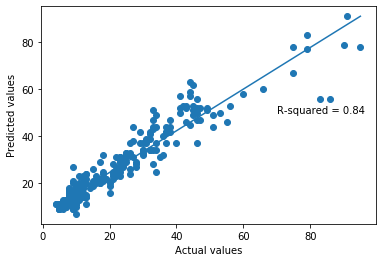

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv

pm10=np.load('pm10_con_data_val.npy',allow_pickle=True)
pm25=np.load('pm2.5_con_data_val.npy',allow_pickle=True)

unique, counts = np.unique(pm10, return_counts=True)

pm10 = dict(zip(unique, counts))

unique, counts = np.unique(pm25, return_counts=True)

pm25 = dict(zip(unique, counts))

somedict = pm25
with open('pm25.csv','w') as f:
    w = csv.writer(f)
    for i in somedict.keys():
        w.writerow([i,somedict[i]])
    

